In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Evde_Bakım_Hizmeti_Talepleri.xlsx to Evde_Bakım_Hizmeti_Talepleri.xlsx


In [ ]:
file_name = list(uploaded.keys())[0]
print(f"Yuklenen dosya: {file_name}")

Yuklenen dosya: Evde_Bakım_Hizmeti_Talepleri.xlsx


In [ ]:
data = pd.ExcelFile(file_name)

print("Excel dosyasındaki sayfa isimleri:", data.sheet_names)

df = data.parse("Worksheet")

df.head()

Excel dosyasındaki sayfa isimleri: ['Worksheet']


,HIZMET_BASLAMA_TARIHI,ILCE,MAHALLE,CINSIYET,TALEP_KISISEL_BAKIM,TALEP_TEMIZLIK,TALEP_FIZIKSEL_AKTIVITE_DESTEGI,TALEP_PSIKOLOJIK_DESTEK,TALEP_KUAFOR,VH_KISISEL_BAKIM,...,DOĞUM_TARIHI,MEDENI_DURUMU,SOSYAL_GUVENCESI,HANE_HALKI_SAYISI,EGITIM_DURUMU,YURUYOR,DESTEKLE_YURUYOR,TEKERLEKLI_SANDALYE,YATAGA_BAGIMLI,HIZMET_BITIS_TARIHI
0,1.07.2020,BUCA,ÇAMLIKULE,KADIN,NaN,NaN,NaN,NaN,NaN,NaN,...,1936,DUL,SGK,5,NaN,NaN,NaN,NaN,X,NaN
1,1.07.2020,BUCA,KURUÇEŞME,ERKEK,NaN,X,X,X,NaN,NaN,...,1967,DUL,SGK,1,NaN,NaN,X,NaN,NaN,22.03.2022
2,1.07.2020,BUCA,BARIŞ,KADIN,NaN,X,X,NaN,NaN,NaN,...,1947,EVLİ,SGK,2,NaN,NaN,X,NaN,NaN,11.07.2023
3,1.07.2020,BUCA,GÖKSU,KADIN,X,NaN,X,NaN,NaN,X,...,1982,EVLİ,SGK,4,NaN,NaN,NaN,NaN,X,NaN
4,1.07.2020,BUCA,AYDOĞDU,ERKEK,X,NaN,X,NaN,NaN,X,...,1958,EVLİ,SGK,2,NaN,NaN,NaN,NaN,X,NaN


In [ ]:
df_original = df.copy()

In [ ]:
#Veri setinin kolon bilgileri icin
print("Kolonlar ve veri turleri:")
df.info()

#Eksik veri analizi
print("\Eksik veri sayilari:")
print(df.isnull().sum())

Kolonlar ve veri turleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   HIZMET_BASLAMA_TARIHI            5867 non-null   object
 1   ILCE                             5867 non-null   object
 2   MAHALLE                          5866 non-null   object
 3   CINSIYET                         5867 non-null   object
 4   TALEP_KISISEL_BAKIM              3654 non-null   object
 5   TALEP_TEMIZLIK                   3053 non-null   object
 6   TALEP_FIZIKSEL_AKTIVITE_DESTEGI  665 non-null    object
 7   TALEP_PSIKOLOJIK_DESTEK          920 non-null    object
 8   TALEP_KUAFOR                     739 non-null    object
 9   VH_KISISEL_BAKIM                 2717 non-null   object
 10  VH_TEMIZLIK                      1029 non-null   object
 11  VH_FIZIKSEL_AKTIVITE_DESTEGI     644 non-null    object
 12  VH_PSIKO

In [ ]:
# "TALEP" ve "VH" ile baslayan sutunlari dinamik olarak secmek icin
talep_sutunlari = [col for col in df.columns if col.startswith('TALEP')]
vh_sutunlari = [col for col in df.columns if col.startswith('VH')]

In [ ]:
# Talep sutunlarindaki bosluklari "0" ile dolduralim
df[talep_sutunlari] = df[talep_sutunlari].fillna("0")

# Bu sutunlardaki eksiklikler, eksik bilgi degil de hizmetin istenmedigi sonucuyla alakali

# VH sütunlarındaki boşlukları "0" ile dolduralim
df[vh_sutunlari] = df[vh_sutunlari].fillna("0")

In [ ]:
#Veri setinin kolon bilgileri icin
print("Kolonlar ve veri turleri:")
df.info()

#Eksik veri analizi
print("\Eksik veri sayilari:")
print(df.isnull().sum())

Kolonlar ve veri turleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   HIZMET_BASLAMA_TARIHI            5867 non-null   object
 1   ILCE                             5867 non-null   object
 2   MAHALLE                          5866 non-null   object
 3   CINSIYET                         5867 non-null   object
 4   TALEP_KISISEL_BAKIM              5867 non-null   object
 5   TALEP_TEMIZLIK                   5867 non-null   object
 6   TALEP_FIZIKSEL_AKTIVITE_DESTEGI  5867 non-null   object
 7   TALEP_PSIKOLOJIK_DESTEK          5867 non-null   object
 8   TALEP_KUAFOR                     5867 non-null   object
 9   VH_KISISEL_BAKIM                 5867 non-null   object
 10  VH_TEMIZLIK                      5867 non-null   object
 11  VH_FIZIKSEL_AKTIVITE_DESTEGI     5867 non-null   object
 12  VH_PSIKO

In [ ]:
df_step1 = df.copy()  # Adım 1 öncesi yedek
df['Yeni_Sutun1'] = 'Adım 1 İşlem'  # Detayli Temizleme işlemi 1
print("Adım 1 sonrası df:\n", df.head())

Adım 1 sonrası df:
   HIZMET_BASLAMA_TARIHI  ILCE    MAHALLE CINSIYET TALEP_KISISEL_BAKIM  \
0             1.07.2020  BUCA  ÇAMLIKULE    KADIN                   0   
1             1.07.2020  BUCA  KURUÇEŞME    ERKEK                   0   
2             1.07.2020  BUCA      BARIŞ    KADIN                   0   
3             1.07.2020  BUCA      GÖKSU    KADIN                   X   
4             1.07.2020  BUCA    AYDOĞDU    ERKEK                   X   

  TALEP_TEMIZLIK TALEP_FIZIKSEL_AKTIVITE_DESTEGI TALEP_PSIKOLOJIK_DESTEK  \
0              0                               0                       0   
1              X                               X                       X   
2              X                               X                       0   
3              0                               X                       0   
4              0                               X                       0   

  TALEP_KUAFOR VH_KISISEL_BAKIM  ... MEDENI_DURUMU SOSYAL_GUVENCESI  \
0            

In [ ]:
# 1. Doğum tarihine varsayılan ay ve gün ekleme (01.01)
df['DOĞUM_TARIHI'] = pd.to_datetime(df['DOĞUM_TARIHI'].astype(str) + '-01-01', format='%Y-%m-%d', errors='coerce')

# 2. Hizmet başlama tarihini datetime formatına dönüştürme
df['HIZMET_BASLAMA_TARIHI'] = pd.to_datetime(df['HIZMET_BASLAMA_TARIHI'], format='%d.%m.%Y', errors='coerce')

# 3. Hizmet bitiş tarihini datetime formatına dönüştürme
df['HIZMET_BITIS_TARIHI'] = pd.to_datetime(df['HIZMET_BITIS_TARIHI'], format='%d.%m.%Y', errors='coerce')

# 4. Hizmet başlangıcındaki yaşı hesaplama
df['YAŞ_HIZMET_BASLANGICI'] = df['HIZMET_BASLAMA_TARIHI'].dt.year - df['DOĞUM_TARIHI'].dt.year

# 5. Eğer hizmet başlama tarihi doğum tarihinden önceyse yaş düzeltme
df.loc[df['HIZMET_BASLAMA_TARIHI'] < df['DOĞUM_TARIHI'], 'YAŞ_HIZMET_BASLANGICI'] -= 1

# Yaş istatistiklerini kontrol et
max_age = df['YAŞ_HIZMET_BASLANGICI'].max()
min_age = df['YAŞ_HIZMET_BASLANGICI'].min()

print(f"Hizmet başlangıcındaki maksimum yaş: {max_age}")
print(f"Hizmet başlangıcındaki minimum yaş: {min_age}")

# Hatalı veriler varsa kontrol
invalid_rows = df[df['YAŞ_HIZMET_BASLANGICI'].isna()]
print(f"Hatalı veriler:\n{invalid_rows[['DOĞUM_TARIHI', 'HIZMET_BASLAMA_TARIHI', 'HIZMET_BITIS_TARIHI']].head()}")

Hizmet başlangıcındaki maksimum yaş: 103.0
Hizmet başlangıcındaki minimum yaş: 0.0
Hatalı veriler:
     DOĞUM_TARIHI HIZMET_BASLAMA_TARIHI HIZMET_BITIS_TARIHI
145           NaT            2020-08-26                 NaT
365           NaT            2020-12-14                 NaT
427           NaT            2021-01-20          2023-05-26
1563          NaT            2022-01-18                 NaT
1658          NaT            2022-03-22                 NaT


In [ ]:
# Sayısal sütunu integer formatına dönüştürelim
df['HANE_HALKI_SAYISI'] = pd.to_numeric(df['HANE_HALKI_SAYISI'], errors='coerce')

# Sonuçları kontrol edelim
print("Sayısal sütunlar dönüştürüldü:")
print(df['HANE_HALKI_SAYISI'].head())

Sayısal sütunlar dönüştürüldü:
0    5.0
1    1.0
2    2.0
3    4.0
4    2.0
Name: HANE_HALKI_SAYISI, dtype: float64


In [ ]:
# Veri türlerini kontrol edelim
print("Güncellenmiş veri türleri:")
print(df.info())

Güncellenmiş veri türleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   HIZMET_BASLAMA_TARIHI            5867 non-null   datetime64[ns]
 1   ILCE                             5867 non-null   object        
 2   MAHALLE                          5866 non-null   object        
 3   CINSIYET                         5867 non-null   object        
 4   TALEP_KISISEL_BAKIM              5867 non-null   object        
 5   TALEP_TEMIZLIK                   5867 non-null   object        
 6   TALEP_FIZIKSEL_AKTIVITE_DESTEGI  5867 non-null   object        
 7   TALEP_PSIKOLOJIK_DESTEK          5867 non-null   object        
 8   TALEP_KUAFOR                     5867 non-null   object        
 9   VH_KISISEL_BAKIM                 5867 non-null   object        
 10  VH_TEMIZLIK                      

In [ ]:
# Adım 2: İkinci işleme
df_step2 = df.copy()  # Adım 2 öncesi yedek
df['Yeni_Sutun2'] = 'Adım 2 İşlem'
print("Adım 2 sonrası df:\n", df.head())

Adım 2 sonrası df:
   HIZMET_BASLAMA_TARIHI  ILCE    MAHALLE CINSIYET TALEP_KISISEL_BAKIM  \
0            2020-07-01  BUCA  ÇAMLIKULE    KADIN                   0   
1            2020-07-01  BUCA  KURUÇEŞME    ERKEK                   0   
2            2020-07-01  BUCA      BARIŞ    KADIN                   0   
3            2020-07-01  BUCA      GÖKSU    KADIN                   X   
4            2020-07-01  BUCA    AYDOĞDU    ERKEK                   X   

  TALEP_TEMIZLIK TALEP_FIZIKSEL_AKTIVITE_DESTEGI TALEP_PSIKOLOJIK_DESTEK  \
0              0                               0                       0   
1              X                               X                       X   
2              X                               X                       0   
3              0                               X                       0   
4              0                               X                       0   

  TALEP_KUAFOR VH_KISISEL_BAKIM  ... HANE_HALKI_SAYISI EGITIM_DURUMU YURUYOR  \
0   

In [ ]:
# Kategorik sütunları seçelim
kategorik_sutunlar = df.select_dtypes(include=['object']).columns

# Sayısal sütunları seçelim
sayisal_sutunlar = df.select_dtypes(exclude=['object']).columns

In [ ]:
# Kategorik sütunlardaki eksik değerleri "Bilgi Verilmedi" ile dolduralım
df[kategorik_sutunlar] = df[kategorik_sutunlar].fillna("EKSIK VERI")

# Sayısal sütunlardaki eksik değerleri -1 ile dolduralım
df[sayisal_sutunlar] = df[sayisal_sutunlar].fillna(-1)

In [ ]:
# Sonuçları kontrol edelim
print("Eksik veriler dolduruldu.")
print("Kategorik sütunlardaki eksik veri sayıları:")
print(df[kategorik_sutunlar].isnull().sum())
print("\nSayısal sütunlardaki eksik veri sayıları:")
print(df[sayisal_sutunlar].isnull().sum())

Eksik veriler dolduruldu.
Kategorik sütunlardaki eksik veri sayıları:
ILCE                               0
MAHALLE                            0
CINSIYET                           0
TALEP_KISISEL_BAKIM                0
TALEP_TEMIZLIK                     0
TALEP_FIZIKSEL_AKTIVITE_DESTEGI    0
TALEP_PSIKOLOJIK_DESTEK            0
TALEP_KUAFOR                       0
VH_KISISEL_BAKIM                   0
VH_TEMIZLIK                        0
VH_FIZIKSEL_AKTIVITE_DESTEGI       0
VH_PSIKOLOJIK_DESTEK               0
VH_KUAFOR                          0
KARAR_DURUMU                       0
HZIMETIN_SON_DURUMU                0
MEDENI_DURUMU                      0
SOSYAL_GUVENCESI                   0
EGITIM_DURUMU                      0
YURUYOR                            0
DESTEKLE_YURUYOR                   0
TEKERLEKLI_SANDALYE                0
YATAGA_BAGIMLI                     0
Yeni_Sutun1                        0
Yeni_Sutun2                        0
dtype: int64

Sayısal sütunlardaki eksik v

In [ ]:
# Medeni Durumu eşsiz değerlerini kontrol et
print(df['MEDENI_DURUMU'].unique())

['DUL' 'EVLİ' 'BEKAR' 'EKSIK VERI' 'EVLİ ' 'BEKAR ' 2 3 1 6 4 5]


In [ ]:
# Beklenen değerleri tanımlayalım
beklenen_medeni_durum = ['DUL', 'EVLİ', 'BEKAR']

# Değerleri temizleyelim ve hatalı olanları "BİLGİ VERİLMEDİ" yapalım
df['MEDENI_DURUMU'] = df['MEDENI_DURUMU'].str.strip()  # Boşlukları temizle
df['MEDENI_DURUMU'] = df['MEDENI_DURUMU'].apply(
    lambda x: x if x in beklenen_medeni_durum else "EKSIK VERI"
)

# Güncel eşsiz değerleri kontrol edelim
print("Güncel Medeni Durumu eşsiz değerler:")
print(df['MEDENI_DURUMU'].unique())

Güncel Medeni Durumu eşsiz değerler:
['DUL' 'EVLİ' 'BEKAR' 'EKSIK VERI']


In [ ]:
# Eşsiz değerleri ve sıklıklarını kontrol et
print("Medeni Durumu sütununun güncel frekansları:")
print(df['MEDENI_DURUMU'].value_counts())

Medeni Durumu sütununun güncel frekansları:
MEDENI_DURUMU
DUL           2381
EVLİ          2186
BEKAR          857
EKSIK VERI     443
Name: count, dtype: int64


In [ ]:
# Güncel eşsiz değerleri kontrol edelim
print("Güncel Cinsiyet eşsiz değerler:")
print(df['CINSIYET'].unique())

Güncel Cinsiyet eşsiz değerler:
['KADIN' 'ERKEK' 'KADIN ' 'kADIN']


In [ ]:
# Beklenen değerleri büyük harflerle tanımlayalım
beklenen_cinsiyet = ["KADIN", "ERKEK"]

# Değerleri temizleyelim ve hatalı olanları "EKSİK BİLGİ" yapalım
df['CINSIYET'] = df['CINSIYET'].str.strip()  # Boşlukları temizle
df['CINSIYET'] = df['CINSIYET'].apply(lambda x: x if x in beklenen_cinsiyet else "EKSIK VERI")

# Güncel eşsiz değerleri kontrol edelim
print("Güncel Cinsiyet eşsiz değerler:")
print(df['CINSIYET'].unique())

Güncel Cinsiyet eşsiz değerler:
['KADIN' 'ERKEK' 'EKSIK VERI']


In [ ]:
# Güncel değerlerin dağılımını kontrol et
print("Cinsiyet sütununun güncel frekansları:")
print(df['CINSIYET'].value_counts())

Cinsiyet sütununun güncel frekansları:
CINSIYET
KADIN         3731
ERKEK         2129
EKSIK VERI       7
Name: count, dtype: int64


In [ ]:
# Adım 3: Ucuncu işleme
df_step3 = df.copy()  # Adım 3 öncesi yedek
df['Yeni_Sutun3'] = 'Adım 3 İşlem'
print("Adım 3 sonrası df:\n", df.head())

In [ ]:
print(df['SOSYAL_GUVENCESI'].unique())

['SGK' 'EMEKLİ SANDIĞI' 'BAĞ-KUR' 'EKSIK VERI' 'YETİM AYLIĞI' 'YEŞİLKART'
 'ENGELLİ AYLIĞI' 'YAŞLILIK AYLIĞI' 'YOK' 'BAKIM AYLIĞI'
 'YURT DIŞI EMEKLİSİ' 'DEVLET SOSYAL UYUM \nYADIMI' 'BAĞ-KUR '
 'ÖZEL SAĞLIK SİGORTA' 'GSS' 'NAFAKA' 'GAZİ AYLIĞI' 'ŞEHİT AYLIĞI'
 'OKUR-YAZAR' 'LİSE' 'İLKOKUL' 'ORTAOKUL' 'ÜNİVERSİTE' 'AKADEMİ'
 'OKUR YAZAR DEĞİL' 'OKUR YAZAR ' 'OKUR YAZAR' 'OKUR' 'YÜKSEK LİSANS']


In [ ]:
# Beklenen değerleri tanımlayalım
beklenen_sosyal_guvence = [
    'SGK', 'EMEKLİ SANDIĞI', 'BAĞ-KUR', 'YETİM AYLIĞI', 'YEŞİLKART',
    'ENGELLİ AYLIĞI', 'YAŞLILIK AYLIĞI', 'YOK', 'BAKIM AYLIĞI',
    'YURT DIŞI EMEKLİSİ', 'ÖZEL SAĞLIK SİGORTA', 'GSS', 'NAFAKA',
    'GAZİ AYLIĞI', 'ŞEHİT AYLIĞI'
]

# Değerleri temizleyelim ve hatalı olanları "EKSIK VERI" olarak işaretleyelim
df['SOSYAL_GUVENCESI'] = df['SOSYAL_GUVENCESI'].str.strip()  # Fazla boşlukları temizle
df['SOSYAL_GUVENCESI'] = df['SOSYAL_GUVENCESI'].apply(
    lambda x: x if x in beklenen_sosyal_guvence else "EKSIK VERI"
)

# Güncel eşsiz değerleri kontrol edelim
print("Güncel Sosyal Güvence eşsiz değerler:")
print(df['SOSYAL_GUVENCESI'].unique())

Güncel Sosyal Güvence eşsiz değerler:
['SGK' 'EMEKLİ SANDIĞI' 'BAĞ-KUR' 'EKSIK VERI' 'YETİM AYLIĞI' 'YEŞİLKART'
 'ENGELLİ AYLIĞI' 'YAŞLILIK AYLIĞI' 'YOK' 'BAKIM AYLIĞI'
 'YURT DIŞI EMEKLİSİ' 'ÖZEL SAĞLIK SİGORTA' 'GSS' 'NAFAKA' 'GAZİ AYLIĞI'
 'ŞEHİT AYLIĞI']


In [ ]:
print(df['EGITIM_DURUMU'].unique())

['EKSIK VERI' 'İLKOKUL' 'LİSE' 'ORTAOKUL' 'YOK' 'OKUR-YAZAR' 'ÜNİVERSİTE'
 'BİLİNMİYOR' 'YÜKSEK LİSANS' 'ÖZEL EĞİTİM' 'OKUR-YAZAR DEĞİL'
 'KÖY ENSİTÜSÜ' 'DİĞER' 'ÖĞRETMEN OKULU' 'ÖNLİSANS' 'MESLEK OKULU' 'X']


In [ ]:
# Beklenen eğitim durumu değerlerini tanımlayalım
beklenen_egitim_durumu = [
    'İLKOKUL', 'ORTAOKUL', 'LİSE', 'ÜNİVERSİTE', 'OKUR-YAZAR DEĞİL', 'DOKTORA', 'YÜKSEK LİSANS', 'ÖZEL EĞİTİM', 'OKUR-YAZAR', 'KÖY ENSİTÜSÜ', 'DİĞER', 'ÖĞRETMEN OKULU' 'ÖNLİSANS' 'MESLEK OKULU'
]

# Eğitim durumu sütunundaki boşlukları temizleyelim ve hatalı olanları "EKSIK VERI" yapalım
df['EGITIM_DURUMU'] = df['EGITIM_DURUMU'].str.strip()  # Fazla boşlukları temizle
df['EGITIM_DURUMU'] = df['EGITIM_DURUMU'].apply(
    lambda x: x if x in beklenen_egitim_durumu else "EKSIK VERI"
)

# Güncel eşsiz değerleri kontrol edelim
print("Güncel Eğitim Durumu Eşsiz Değerler:")
print(df['EGITIM_DURUMU'].unique())

# Eğitim durumu frekanslarını yazdıralım
print("Eğitim Durumu Frekansları:")
print(df['EGITIM_DURUMU'].value_counts())

Güncel Eğitim Durumu Eşsiz Değerler:
['EKSIK VERI' 'İLKOKUL' 'LİSE' 'ORTAOKUL' 'OKUR-YAZAR' 'ÜNİVERSİTE'
 'YÜKSEK LİSANS' 'ÖZEL EĞİTİM' 'OKUR-YAZAR DEĞİL' 'KÖY ENSİTÜSÜ' 'DİĞER']
Eğitim Durumu Frekansları:
EGITIM_DURUMU
EKSIK VERI          2792
İLKOKUL             1642
LİSE                 393
OKUR-YAZAR           329
ORTAOKUL             292
ÜNİVERSİTE           224
OKUR-YAZAR DEĞİL     153
ÖZEL EĞİTİM           35
YÜKSEK LİSANS          3
DİĞER                  3
KÖY ENSİTÜSÜ           1
Name: count, dtype: int64


In [ ]:
# İlçe sütunundaki eşsiz değerleri kontrol edelim
print("İlçe Sütununun Eşsiz Değerleri:")
print(df['ILCE'].unique())

# Mahalle sütunundaki eşsiz değerleri kontrol edelim
print("\nMahalle Sütununun Eşsiz Değerleri:")
print(df['MAHALLE'].unique())

İlçe Sütununun Eşsiz Değerleri:
['BUCA' 'KARABAĞLAR' 'GÜZELBAHÇE' 'KARŞIYAKA' 'NARLIDERE' 'KONAK'
 'BALÇOVA' 'SEFERİHİSAR' 'BAYRAKLI' 'FOÇA' 'MENEMEN' 'MENDERES'
 'KONAK\nKARŞIYAKA\nKONAK\nMENEMEN' 'ÇEŞME' 'BUCA\nSEFERİHİSAR' 'GAZİEMİR'
 'KEMALPAŞA' 'TORBALI' 'BORNOVA' 'URLA' 'ÇİĞLİ' 'KONAK\nBUCA'
 'ÇİĞLİ\nURLA\nTORBALI \nNARLIDERE' 'TİRE\nTORBALI' 'BORNOVA '
 'GÜZELBAHÇE\nKONAK' 'BUCA\nTORBALI' 'KARABAĞLAR ' 'KARABURUN\nKONAK '
 'BUCA ' 'KEMALPAŞA ' 'KARŞIYAKA\nBALÇOVA' 'KONAK\nKARABAĞLAR'
 'KARŞIYAKA\nÇEŞME' 'BUCA\nKONAK' 'ALİAĞA' 'KARABURUN'
 'KARABAĞLAR\nNARLIDERE' 'BAYRAKLI ' 'BORNOVA\nSEFERİHİSAR'
 'KARŞIYAKA\nMENDERES' 'NARLIDERE\nKARŞIYAKA' 'ÖDEMİŞ' 'GÜZELBAHÇE '
 'BALÇOVA\nKONAK' 'URLA\nKARABAĞLAR' 'BORNOVA\nBUCA' 'BUCA\nBORNOVA'
 'TORBALI\nBAYRAKLI' 'KONAK\nSEFERİHİSAR' 'GÜZELBAHÇE\nKARŞIYAKA'
 'KARŞIYAKA\nDİKİLİ' 'KARŞIYAKA\nBAYRAKLI' 'YENİ FOÇA' 'URLA\nBUCA'
 'BUCA\nURLA' 'KARŞIYAKA\nKARABAĞLAR' 'DİKİLİ'
 'KARABAĞLAR\nKONAK\nKARABAĞLAR' 'KARABAĞLAR\nKARABAĞLAR' 'MENEMEN\nKO

In [ ]:
# İzmir ilçelerinin doğru listesi
beklenen_ilceler = [
    "KONAK", "KARŞIYAKA", "BORNOVA", "BUCA", "BALÇOVA", "GAZİEMİR", "ÇİĞLİ",
    "MENEMEN", "ALİAĞA", "TORBALI", "SEFERİHİSAR", "URLA", "KEMALPAŞA",
    "BAYRAKLI", "NARLIDERE", "FOÇA", "BERGAMA", "BEYDAĞ", "DİKİLİ", "KARABURUN",
    "KINIK", "KİRAZ", "MENDERES", "ÖDEMİŞ", "SELÇUK", "TİRE"
]

In [ ]:
# Güncel değerleri kontrol edelim
print("İlçe Sütununun Güncel Eşsiz Değerleri:")
print(df['ILCE'].value_counts())

In [ ]:
#ILCE sütununda sadece ilk değeri tutalım
df['ILCE'] = df['ILCE'].apply(lambda x: x.split('\n')[0].strip() if isinstance(x, str) else x)

# Güncellenmiş ILCE sütununu kontrol edelim
print("ILCE Sütunu Güncellendi:")
print(df['ILCE'].unique())

In [ ]:
def gelismis_ilce_ayirici(df, beklenen_ilceler):
    def ilce_bul_with_context(row):
        text = str(row['ILCE']).upper().strip() if pd.notna(row['ILCE']) else "BİLİNMİYOR"

        if text in beklenen_ilceler:
            return text

        bulunan_ilceler = []

        # Tüm olası ilçe kombinasyonlarını kontrol et
        for ilce1 in beklenen_ilceler:
            if ilce1 in text:
                kalan_text = text.replace(ilce1, "")
                if kalan_text in beklenen_ilceler:
                    bulunan_ilceler.append((ilce1, kalan_text))

        if bulunan_ilceler:
            if len(bulunan_ilceler) > 1:
                # Birden fazla eşleşme varsa en uzun ilçe ismini al
                return max(bulunan_ilceler[0], key=len)[0]

            return bulunan_ilceler[0][0]

        return "HATALI VERİ"

    # Orijinal değerleri sakla
    df['ILCE_ORIGINAL'] = df['ILCE']
    df['ILCE_TEMIZ'] = df.apply(ilce_bul_with_context, axis=1)

    # Detaylı analiz
    print("\nBirleşik İlçe Analizi:")
    degisiklikler = df[df['ILCE_ORIGINAL'] != df['ILCE_TEMIZ']]

    print(f"\nToplam değişiklik sayısı: {len(degisiklikler)}")
    print("\nDeğişiklik örnekleri:")
    print(degisiklikler.groupby(['ILCE_ORIGINAL', 'ILCE_TEMIZ']).size().head(10))

    return df

# Kullanımı
df = gelismis_ilce_ayirici(df, beklenen_ilceler)

In [ ]:
# Güncellenmiş mahalle sütununu kontrol edelim
print("ILCE Sütunu Güncellendi:")
print(df['ILCE'].unique())

In [ ]:
# Mahalle sütununda sadece ilk değeri tutalım
df['MAHALLE'] = df['MAHALLE'].apply(lambda x: x.split('\n')[0].strip() if isinstance(x, str) else x)

# Güncellenmiş mahalle sütununu kontrol edelim
print("Mahalle Sütunu Güncellendi:")
print(df['MAHALLE'].unique())

In [ ]:
# GRAFIKLER

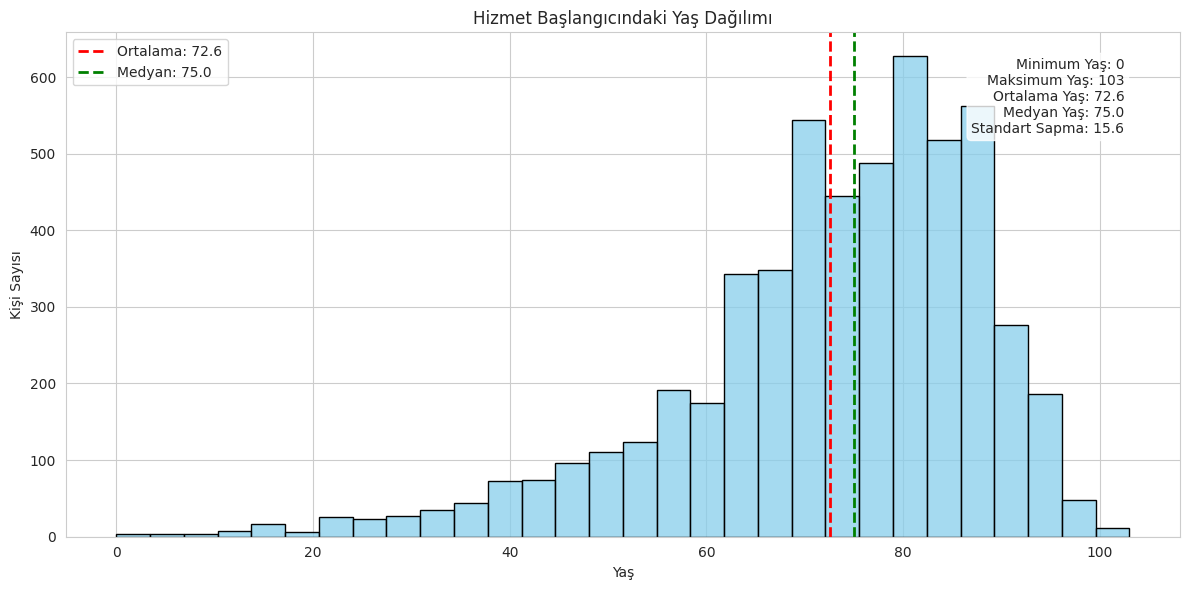


Yaş Gruplarına Göre Dağılım:
0-18: 35 kişi (0.6%)
19-30: 80 kişi (1.5%)
31-45: 246 kişi (4.5%)
46-60: 617 kişi (11.4%)
60+: 4,456 kişi (82.0%)

Eksik Veri Sayısı: 430


In [ ]:
# Veriyi yükleyelim ve temizleyelim
file_path = 'Evde_Bakım_Hizmeti_Talepleri.xlsx'
df = pd.read_excel(file_path, sheet_name='Worksheet')

# Doğum tarihini datetime formatına çevirelim
df['DOĞUM_TARIHI'] = pd.to_datetime(df['DOĞUM_TARIHI'].astype(str), format='%Y', errors='coerce')

# Hizmet başlama tarihini datetime formatına çevirelim
df['HIZMET_BASLAMA_TARIHI'] = pd.to_datetime(df['HIZMET_BASLAMA_TARIHI'], format='%d.%m.%Y', errors='coerce')

# Hizmet başlangıcındaki yaşı hesaplayalım
df['YAŞ_HIZMET_BASLANGICI'] = df.apply(lambda x:
    (x['HIZMET_BASLAMA_TARIHI'].year - x['DOĞUM_TARIHI'].year)
    if pd.notna(x['HIZMET_BASLAMA_TARIHI']) and pd.notna(x['DOĞUM_TARIHI'])
    else None, axis=1)

# Mantıksız yaşları filtreleyelim (örneğin 0'dan küçük veya 120'den büyük)
df['YAŞ_HIZMET_BASLANGICI'] = df['YAŞ_HIZMET_BASLANGICI'].apply(
    lambda x: x if (pd.notna(x) and 0 <= x <= 120) else None)

# Yaş dağılımını görselleştirelim
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Histogram çizelim
sns.histplot(data=df, x='YAŞ_HIZMET_BASLANGICI', bins=30,
             color='skyblue', edgecolor='black')

# Ortalama ve medyan çizgileri
plt.axvline(df['YAŞ_HIZMET_BASLANGICI'].mean(),
            color='red', linestyle='dashed', linewidth=2,
            label=f'Ortalama: {df["YAŞ_HIZMET_BASLANGICI"].mean():.1f}')
plt.axvline(df['YAŞ_HIZMET_BASLANGICI'].median(),
            color='green', linestyle='dashed', linewidth=2,
            label=f'Medyan: {df["YAŞ_HIZMET_BASLANGICI"].median():.1f}')

# Başlık ve etiketler
plt.title('Hizmet Başlangıcındaki Yaş Dağılımı', fontsize=12)
plt.xlabel('Yaş', fontsize=10)
plt.ylabel('Kişi Sayısı', fontsize=10)

# İstatistik kutusu
stats = df['YAŞ_HIZMET_BASLANGICI'].describe()
stats_text = f'Minimum Yaş: {stats["min"]:.0f}\n'
stats_text += f'Maksimum Yaş: {stats["max"]:.0f}\n'
stats_text += f'Ortalama Yaş: {stats["mean"]:.1f}\n'
stats_text += f'Medyan Yaş: {stats["50%"]:.1f}\n'
stats_text += f'Standart Sapma: {stats["std"]:.1f}'

plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

# Yaş gruplarını oluşturalım
yaş_gruplari = pd.cut(df['YAŞ_HIZMET_BASLANGICI'],
                      bins=[0, 18, 30, 45, 60, 120],
                      labels=['0-18', '19-30', '31-45', '46-60', '60+'])

print("\nYaş Gruplarına Göre Dağılım:")
yaş_grup_dagilimi = yaş_gruplari.value_counts().sort_index()
for grup, sayi in yaş_grup_dagilimi.items():
    yuzde = (sayi / len(yaş_gruplari.dropna())) * 100
    print(f"{grup}: {sayi:,} kişi ({yuzde:.1f}%)")

# Eksik veri analizi
eksik_veri = df['YAŞ_HIZMET_BASLANGICI'].isna().sum()
print(f"\nEksik Veri Sayısı: {eksik_veri:,}")

<ipython-input-73-54698e7796e3>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = df_filtered.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


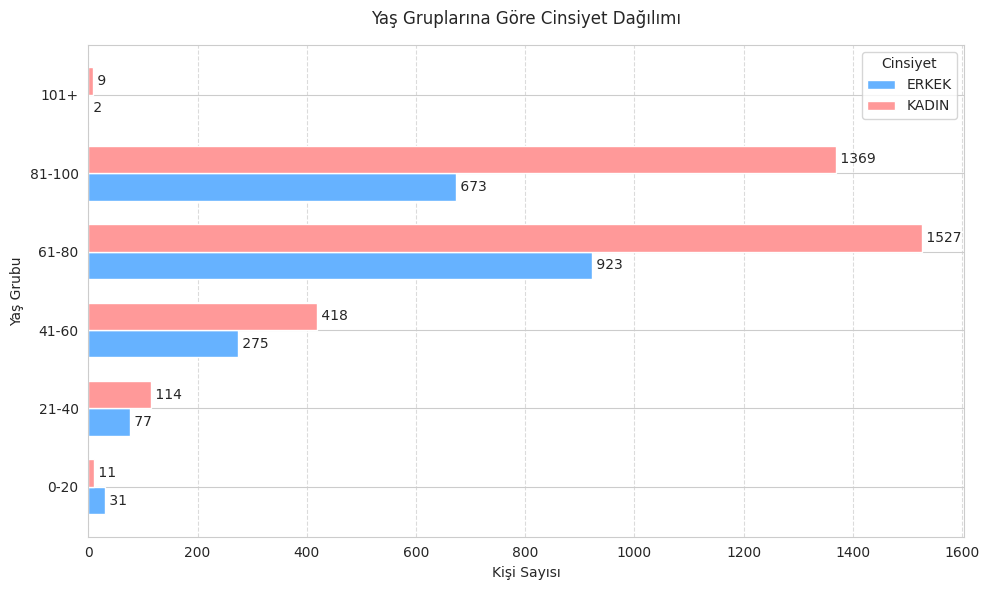


Yaş Gruplarına Göre Toplam Sayılar:
0-20: Toplam 42 kişi (Erkek: 31, Kadın: 11)
21-40: Toplam 191 kişi (Erkek: 77, Kadın: 114)
41-60: Toplam 693 kişi (Erkek: 275, Kadın: 418)
61-80: Toplam 2,455 kişi (Erkek: 923, Kadın: 1,527)
81-100: Toplam 2,045 kişi (Erkek: 673, Kadın: 1,369)
101+: Toplam 11 kişi (Erkek: 2, Kadın: 9)


In [73]:
# Yaş gruplarını oluşturma
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101+']
df['YAŞ_GRUBU'] = pd.cut(df['YAŞ_HIZMET_BASLANGICI'], bins=age_bins, labels=age_labels, right=False)

# NaN değerleri filtreleme
df_filtered = df.dropna(subset=['YAŞ_GRUBU', 'CINSIYET'])

# Yaş gruplarına göre cinsiyet dağılımı
age_gender_distribution = df_filtered.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)

# Grafik boyutunu ayarlama
plt.figure(figsize=(10, 6))

# Barların pozisyonlarını ayarlama
x = np.arange(len(age_labels))
width = 0.35

# Erkek ve Kadın barlarını çizme
plt.barh(x - width/2, age_gender_distribution['ERKEK'], width, label='ERKEK', color='#66B2FF')
plt.barh(x + width/2, age_gender_distribution['KADIN'], width, label='KADIN', color='#FF9999')

# Başlık ve etiketler
plt.title('Yaş Gruplarına Göre Cinsiyet Dağılımı', pad=15)
plt.xlabel('Kişi Sayısı')
plt.ylabel('Yaş Grubu')

# Y ekseni etiketlerini ayarlama
plt.yticks(x, age_labels)

# Barların üzerine sayıları ekleme
for i, v in enumerate(age_gender_distribution['ERKEK']):
    plt.text(v, i - width/2, f' {v}', va='center')
for i, v in enumerate(age_gender_distribution['KADIN']):
    plt.text(v, i + width/2, f' {v}', va='center')

# Göstergeyi ekleme
plt.legend(title='Cinsiyet')

# Izgara çizgilerini ekleme
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Yaş gruplarına göre toplam sayıları gösterme
print("\nYaş Gruplarına Göre Toplam Sayılar:")
toplam_sayilar = age_gender_distribution.sum(axis=1)
for age_group, total in toplam_sayilar.items():
    erkek = age_gender_distribution.loc[age_group, 'ERKEK']
    kadin = age_gender_distribution.loc[age_group, 'KADIN']
    print(f"{age_group}: Toplam {total:,} kişi (Erkek: {erkek:,}, Kadın: {kadin:,})")

<ipython-input-72-823b21f82741>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

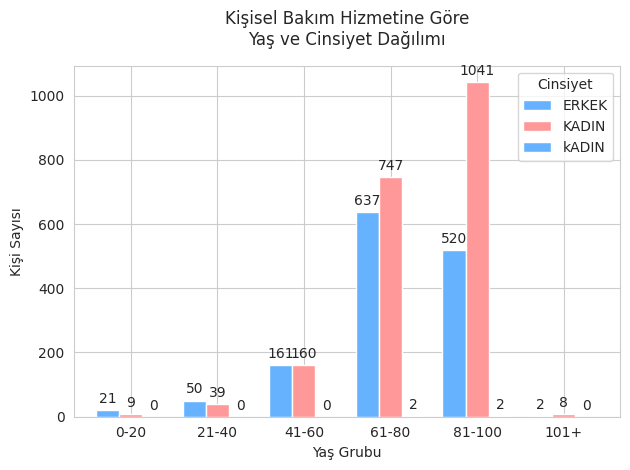


Kişisel Bakım Hizmeti - Dağılım:
Toplam Talep: 3,399 kişi
0-20: 30 kişi (Erkek: 21 - %70.0, Kadın: 9 - %30.0)
21-40: 89 kişi (Erkek: 50 - %56.2, Kadın: 39 - %43.8)
41-60: 321 kişi (Erkek: 161 - %50.2, Kadın: 160 - %49.8)
61-80: 1,384 kişi (Erkek: 637 - %46.0, Kadın: 747 - %54.0)
81-100: 1,561 kişi (Erkek: 520 - %33.3, Kadın: 1,041 - %66.7)
101+: 10 kişi (Erkek: 2 - %20.0, Kadın: 8 - %80.0)
------------------------------------------------------------


<ipython-input-72-823b21f82741>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

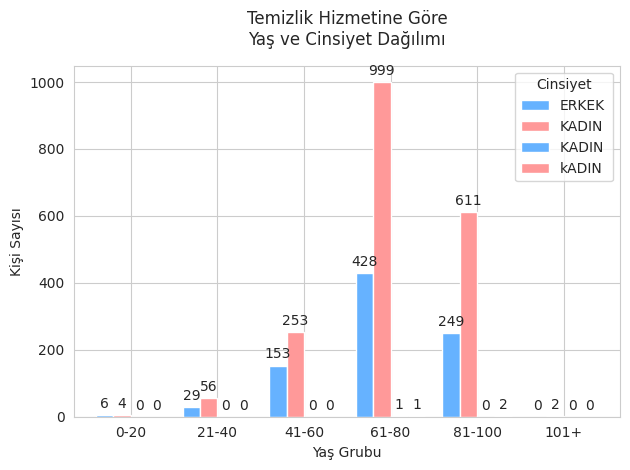


Temizlik Hizmeti - Dağılım:
Toplam Talep: 2,794 kişi
0-20: 10 kişi (Erkek: 6 - %60.0, Kadın: 4 - %40.0)
21-40: 85 kişi (Erkek: 29 - %34.1, Kadın: 56 - %65.9)
41-60: 406 kişi (Erkek: 153 - %37.7, Kadın: 253 - %62.3)
61-80: 1,427 kişi (Erkek: 428 - %30.0, Kadın: 999 - %70.0)
81-100: 860 kişi (Erkek: 249 - %29.0, Kadın: 611 - %71.0)
101+: 2 kişi (Erkek: 0 - %0.0, Kadın: 2 - %100.0)
------------------------------------------------------------


<ipython-input-72-823b21f82741>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

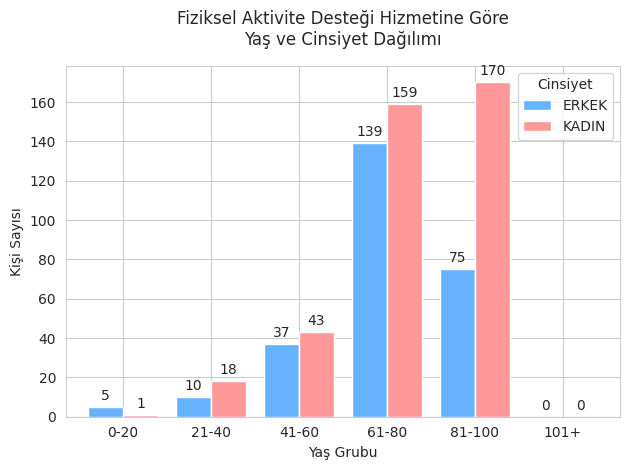


Fiziksel Aktivite Desteği Hizmeti - Dağılım:
Toplam Talep: 657 kişi
0-20: 6 kişi (Erkek: 5 - %83.3, Kadın: 1 - %16.7)
21-40: 28 kişi (Erkek: 10 - %35.7, Kadın: 18 - %64.3)
41-60: 80 kişi (Erkek: 37 - %46.2, Kadın: 43 - %53.8)
61-80: 298 kişi (Erkek: 139 - %46.6, Kadın: 159 - %53.4)
81-100: 245 kişi (Erkek: 75 - %30.6, Kadın: 170 - %69.4)
------------------------------------------------------------


<ipython-input-72-823b21f82741>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

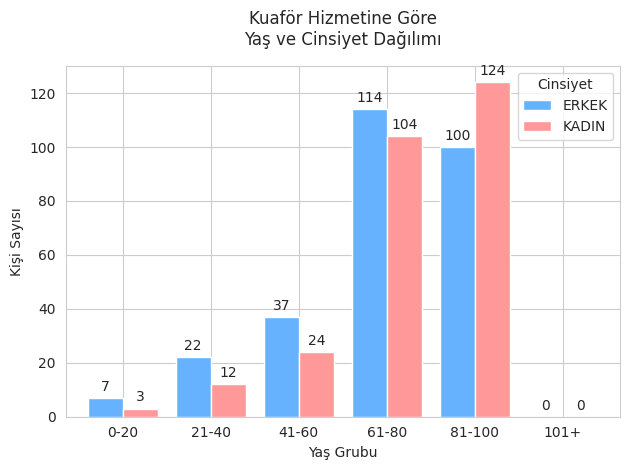


Kuaför Hizmeti - Dağılım:
Toplam Talep: 547 kişi
0-20: 10 kişi (Erkek: 7 - %70.0, Kadın: 3 - %30.0)
21-40: 34 kişi (Erkek: 22 - %64.7, Kadın: 12 - %35.3)
41-60: 61 kişi (Erkek: 37 - %60.7, Kadın: 24 - %39.3)
61-80: 218 kişi (Erkek: 114 - %52.3, Kadın: 104 - %47.7)
81-100: 224 kişi (Erkek: 100 - %44.6, Kadın: 124 - %55.4)
------------------------------------------------------------


<ipython-input-72-823b21f82741>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

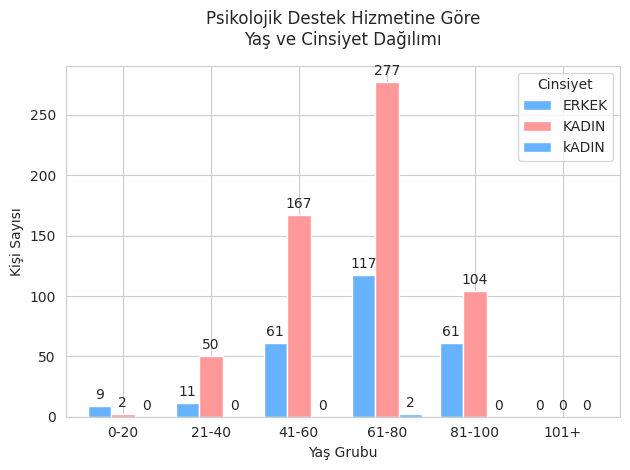


Psikolojik Destek Hizmeti - Dağılım:
Toplam Talep: 861 kişi
0-20: 11 kişi (Erkek: 9 - %81.8, Kadın: 2 - %18.2)
21-40: 61 kişi (Erkek: 11 - %18.0, Kadın: 50 - %82.0)
41-60: 228 kişi (Erkek: 61 - %26.8, Kadın: 167 - %73.2)
61-80: 394 kişi (Erkek: 117 - %29.7, Kadın: 277 - %70.3)
81-100: 165 kişi (Erkek: 61 - %37.0, Kadın: 104 - %63.0)
------------------------------------------------------------


In [72]:
# Hizmet türlerini ve Türkçe karşılıklarını tanımlayalım
service_dict = {
    'TALEP_KISISEL_BAKIM': 'Kişisel Bakım',
    'TALEP_TEMIZLIK': 'Temizlik',
    'TALEP_FIZIKSEL_AKTIVITE_DESTEGI': 'Fiziksel Aktivite Desteği',
    'TALEP_KUAFOR': 'Kuaför',
    'TALEP_PSIKOLOJIK_DESTEK': 'Psikolojik Destek'
}

# Her hizmet türü için grafikleri oluşturma
for service_code, service_name in service_dict.items():
    # Hizmet türüne göre filtreleme
    df_service = df[df[service_code] == 'X']

    # Cinsiyet ve yaş gruplarına göre veri gruplandırma
    service_distribution = df_service.groupby(['YAŞ_GRUBU', 'CINSIYET']).size().unstack(fill_value=0)

    # Eğer hizmet türü için yeterli veri yoksa uyarı ver ve grafiği atla
    if service_distribution.empty:
        print(f"{service_name} hizmeti için yeterli veri bulunamadı.")
        continue

    # Grafik boyutunu ve stilini ayarlama
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Grafik oluşturma
    ax = service_distribution.plot(kind='bar',
                                 color=['#66B2FF', '#FF9999'],
                                 width=0.8)

    # Başlık ve etiketler
    plt.title(f'{service_name} Hizmetine Göre\nYaş ve Cinsiyet Dağılımı',
              fontsize=12, pad=15)
    plt.xlabel('Yaş Grubu', fontsize=10)
    plt.ylabel('Kişi Sayısı', fontsize=10)

    # X ekseni etiketlerini düzenleme
    plt.xticks(rotation=0)

    # Barların üzerine değerleri ekleme
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    # Göstergeyi düzenleme
    plt.legend(title='Cinsiyet')

    # Grafik kenarlarını düzenleme
    plt.tight_layout()

    plt.show()

    # Her hizmet için sayısal özet
    print(f"\n{service_name} Hizmeti - Dağılım:")
    toplam = service_distribution.sum().sum()
    print(f"Toplam Talep: {toplam:,} kişi")

    for age_group in service_distribution.index:
        erkek = service_distribution.loc[age_group, 'ERKEK']
        kadin = service_distribution.loc[age_group, 'KADIN']
        grup_toplam = erkek + kadin
        if grup_toplam > 0:
            erkek_yuzde = (erkek / grup_toplam) * 100
            kadin_yuzde = (kadin / grup_toplam) * 100
            print(f"{age_group}: {grup_toplam:,} kişi "
                  f"(Erkek: {erkek:,} - %{erkek_yuzde:.1f}, "
                  f"Kadın: {kadin:,} - %{kadin_yuzde:.1f})")

    print("-" * 60)

<ipython-input-71-d29ccb992df7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=ilce_dagilimi.index,


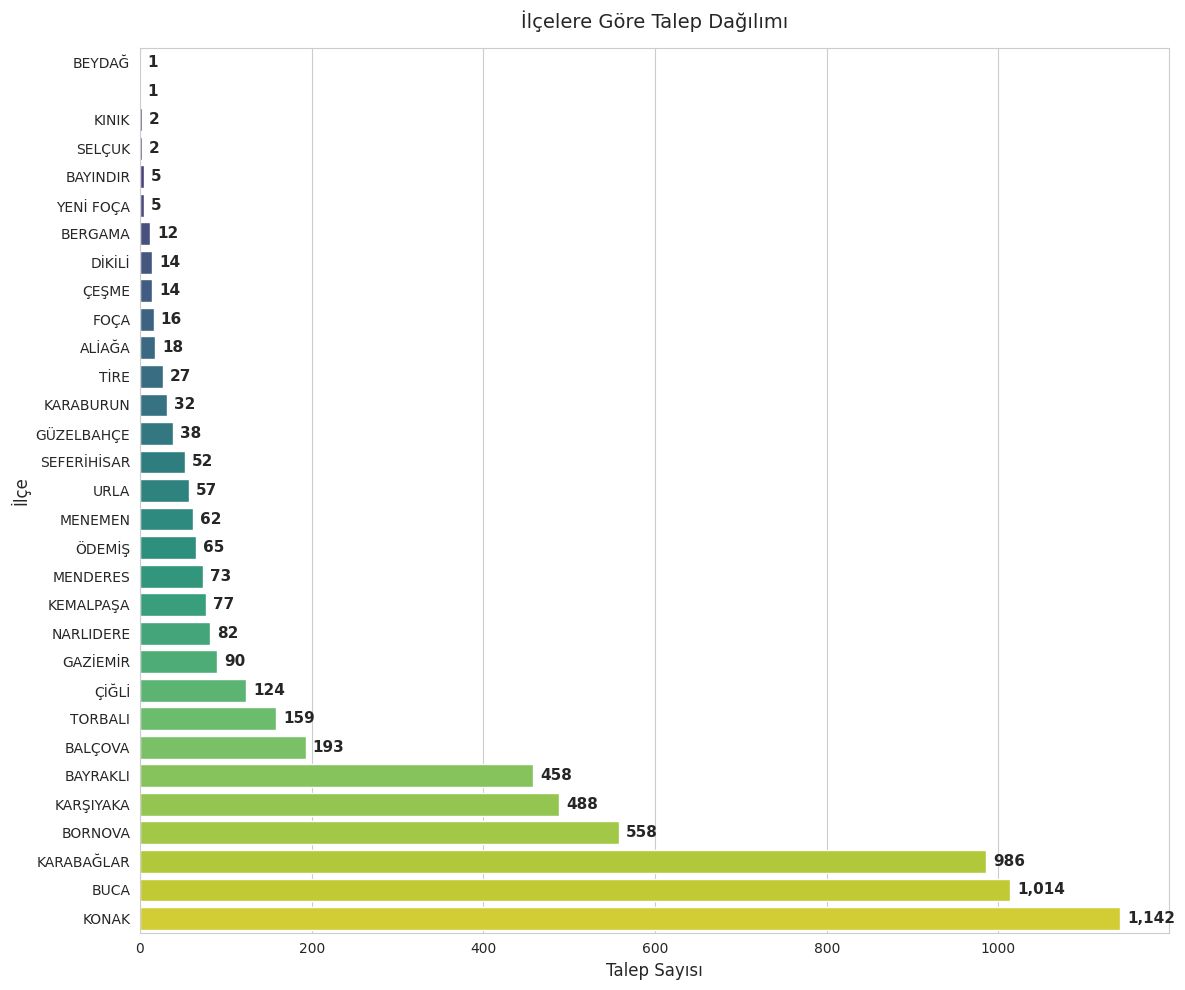


İlçelere Göre Talep Dağılımı Özeti:

Toplam Talep Sayısı: 5,867

BEYDAĞ: 1 talep (0.0%)
: 1 talep (0.0%)
KINIK: 2 talep (0.0%)
SELÇUK: 2 talep (0.0%)
BAYINDIR: 5 talep (0.1%)
YENİ FOÇA: 5 talep (0.1%)
BERGAMA: 12 talep (0.2%)
DİKİLİ: 14 talep (0.2%)
ÇEŞME: 14 talep (0.2%)
FOÇA: 16 talep (0.3%)
ALİAĞA: 18 talep (0.3%)
TİRE: 27 talep (0.5%)
KARABURUN: 32 talep (0.5%)
GÜZELBAHÇE: 38 talep (0.6%)
SEFERİHİSAR: 52 talep (0.9%)
URLA: 57 talep (1.0%)
MENEMEN: 62 talep (1.1%)
ÖDEMİŞ: 65 talep (1.1%)
MENDERES: 73 talep (1.2%)
KEMALPAŞA: 77 talep (1.3%)
NARLIDERE: 82 talep (1.4%)
GAZİEMİR: 90 talep (1.5%)
ÇİĞLİ: 124 talep (2.1%)
TORBALI: 159 talep (2.7%)
BALÇOVA: 193 talep (3.3%)
BAYRAKLI: 458 talep (7.8%)
KARŞIYAKA: 488 talep (8.3%)
BORNOVA: 558 talep (9.5%)
KARABAĞLAR: 986 talep (16.8%)
BUCA: 1,014 talep (17.3%)
KONAK: 1,142 talep (19.5%)


In [71]:
# Veriyi hazırlayalım
ilce_dagilimi = df['ILCE'].value_counts()
ilce_dagilimi = ilce_dagilimi.sort_values(ascending=True)  # Küçükten büyüğe sıralama

# Grafik boyutunu ayarlayalım ve stili belirleyelim
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Grafiği çizelim
ax = sns.barplot(y=ilce_dagilimi.index,
                x=ilce_dagilimi.values,
                palette='viridis')

# Başlık ve eksenleri düzenleyelim
plt.title("İlçelere Göre Talep Dağılımı", fontsize=14, pad=15)
plt.xlabel("Talep Sayısı", fontsize=12)
plt.ylabel("İlçe", fontsize=12)

# Sayıları barların üzerine ekleyelim
for p in ax.patches:
    width = int(p.get_width())
    ax.annotate(f'{width:,}',
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center',
                fontsize=11, fontweight='bold',
                xytext=(5, 0),
                textcoords='offset points')

# Grafik kenarlarını düzenleyelim
plt.tight_layout()

# Grafiği gösterelim
plt.show()

# Sayısal özeti daha detaylı gösterelim
print("\nİlçelere Göre Talep Dağılımı Özeti:")
toplam = len(df)
print(f"\nToplam Talep Sayısı: {toplam:,}\n")
for ilce, sayi in ilce_dagilimi.items():
    yuzde = (sayi / toplam) * 100
    print(f"{ilce}: {sayi:,} talep ({yuzde:.1f}%)")

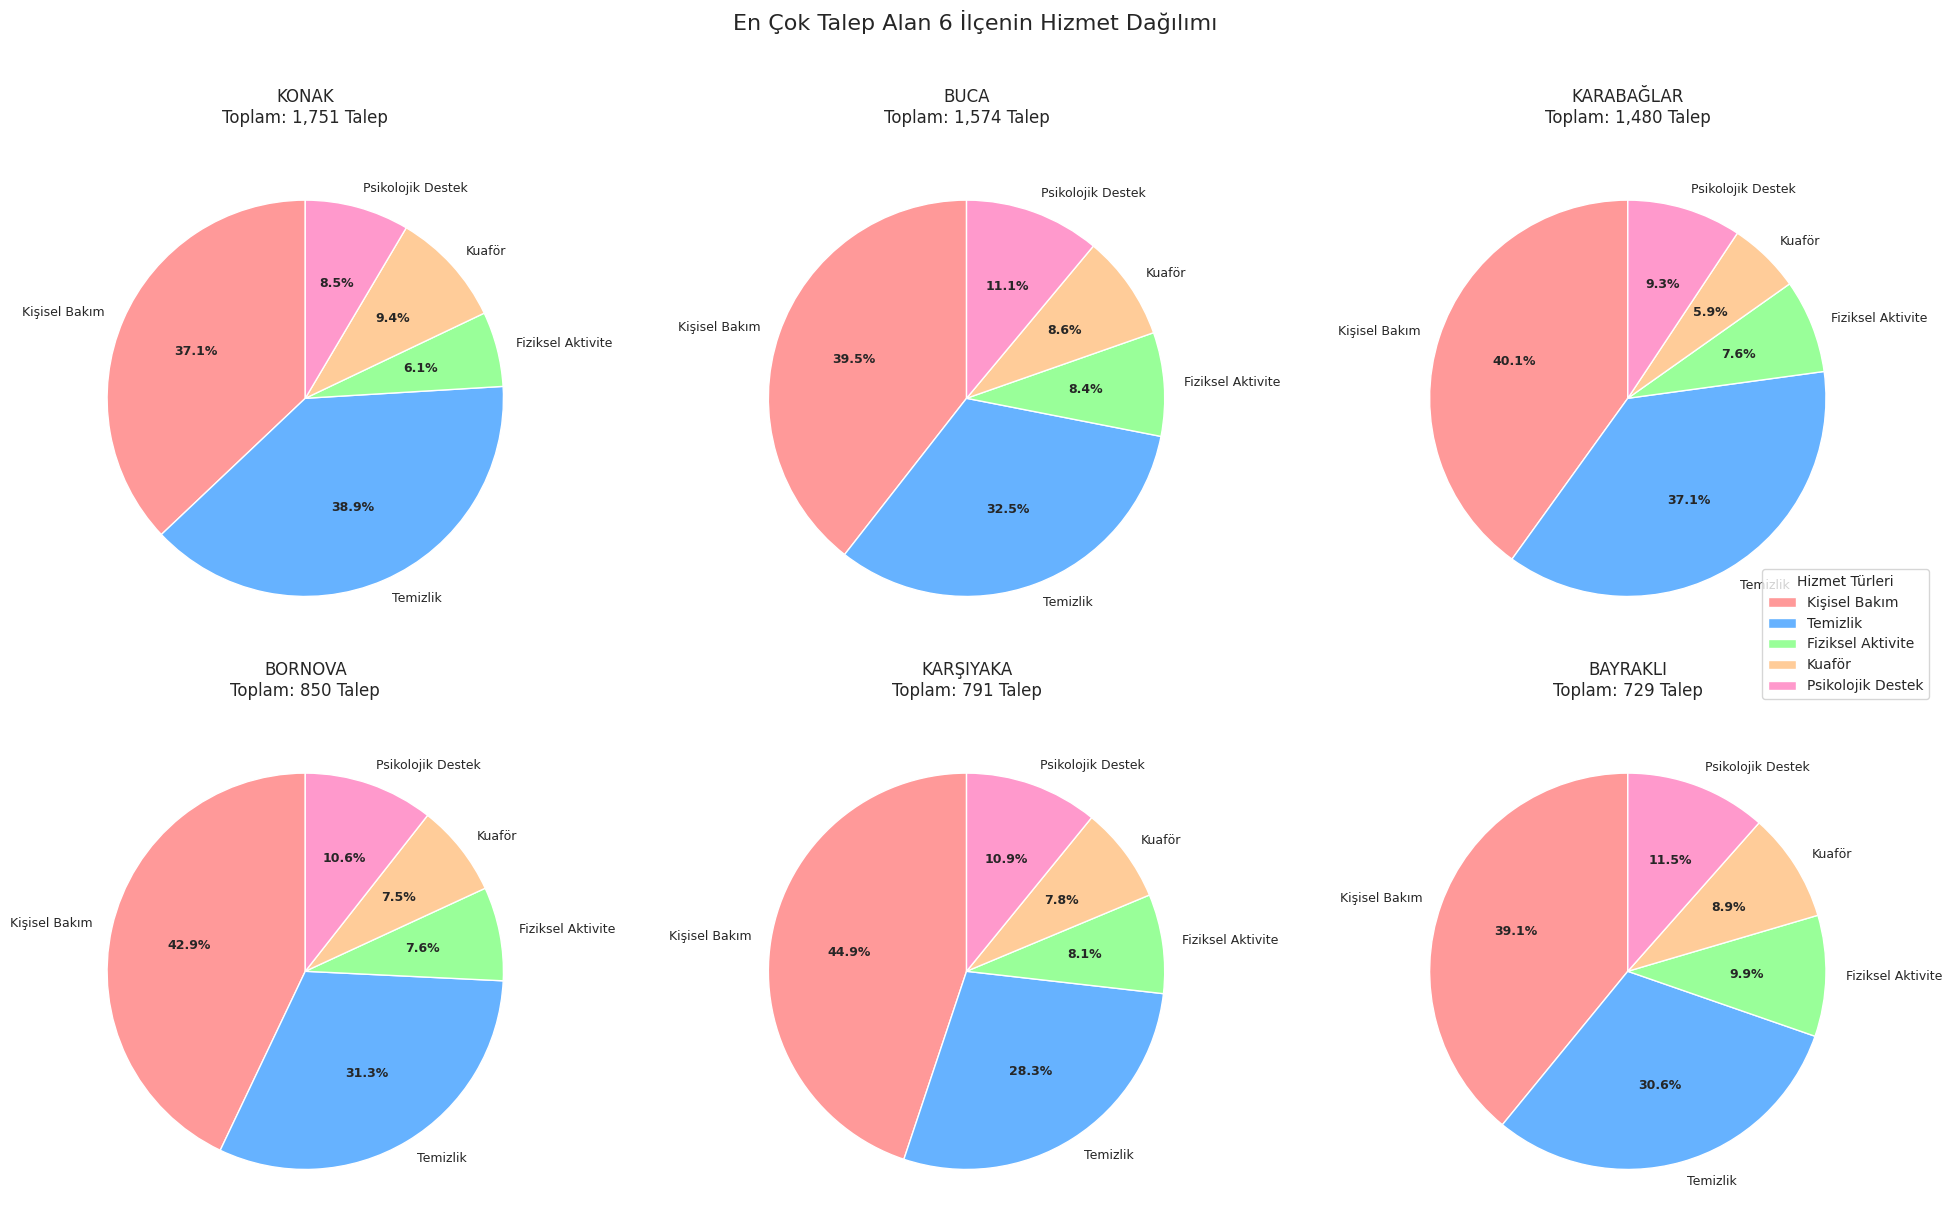


En Çok Talep Alan İlçelerin Hizmet Dağılımı:

KONAK:
  Kişisel Bakım: 649 talep (%37.1)
  Temizlik: 681 talep (%38.9)
  Fiziksel Aktivite: 107 talep (%6.1)
  Kuaför: 165 talep (%9.4)
  Psikolojik Destek: 149 talep (%8.5)

BUCA:
  Kişisel Bakım: 621 talep (%39.5)
  Temizlik: 511 talep (%32.5)
  Fiziksel Aktivite: 133 talep (%8.4)
  Kuaför: 135 talep (%8.6)
  Psikolojik Destek: 174 talep (%11.1)

KARABAĞLAR:
  Kişisel Bakım: 593 talep (%40.1)
  Temizlik: 549 talep (%37.1)
  Fiziksel Aktivite: 113 talep (%7.6)
  Kuaför: 87 talep (%5.9)
  Psikolojik Destek: 138 talep (%9.3)

BORNOVA:
  Kişisel Bakım: 365 talep (%42.9)
  Temizlik: 266 talep (%31.3)
  Fiziksel Aktivite: 65 talep (%7.6)
  Kuaför: 64 talep (%7.5)
  Psikolojik Destek: 90 talep (%10.6)

KARŞIYAKA:
  Kişisel Bakım: 355 talep (%44.9)
  Temizlik: 224 talep (%28.3)
  Fiziksel Aktivite: 64 talep (%8.1)
  Kuaför: 62 talep (%7.8)
  Psikolojik Destek: 86 talep (%10.9)

BAYRAKLI:
  Kişisel Bakım: 285 talep (%39.1)
  Temizlik: 223 talep 

In [70]:
# Hizmet türlerini ve Türkçe karşılıklarını tanımlayalım
service_dict = {
    'TALEP_KISISEL_BAKIM': 'Kişisel Bakım',
    'TALEP_TEMIZLIK': 'Temizlik',
    'TALEP_FIZIKSEL_AKTIVITE_DESTEGI': 'Fiziksel Aktivite',
    'TALEP_KUAFOR': 'Kuaför',
    'TALEP_PSIKOLOJIK_DESTEK': 'Psikolojik Destek'
}

# İlçelere göre hizmet türleri talep sayısını hesaplama
district_service_distribution = df.groupby('ILCE')[service_columns].apply(lambda x: (x == 'X').sum())

# Sütun isimlerini Türkçeleştirelim
district_service_distribution.columns = [service_dict[col] for col in service_columns]

# İlçeleri toplam talep sayısına göre sıralayalım
district_service_distribution['Toplam'] = district_service_distribution.sum(axis=1)
district_service_distribution = district_service_distribution.sort_values('Toplam', ascending=False)

# En çok talebi olan ilk 6 ilçeyi alalım
top_districts = district_service_distribution.head(6)
top_districts = top_districts.drop('Toplam', axis=1)

# Renk paleti
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

# 2x3 subplot oluşturalım
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Her ilçe için pasta grafik oluşturalım
for idx, (ilce, row) in enumerate(top_districts.iterrows()):
    # Sıfır olmayan değerleri filtrele
    data = row[row > 0]

    # Pasta grafik
    wedges, texts, autotexts = axes[idx].pie(data,
                                            labels=data.index,
                                            colors=colors[:len(data)],
                                            autopct='%1.1f%%',
                                            startangle=90)

    # İlçe adını başlık olarak ekle
    axes[idx].set_title(f'{ilce}\nToplam: {int(sum(data)):,} Talep', pad=20)

    # Yazı boyutlarını ayarla
    plt.setp(autotexts, size=9, weight='bold')
    plt.setp(texts, size=9)

# Ana başlık
fig.suptitle('En Çok Talep Alan 6 İlçenin Hizmet Dağılımı',
             fontsize=16, y=1.02)

# Ortak gösterge
fig.legend(top_districts.columns,
          title='Hizmet Türleri',
          loc='center right',
          bbox_to_anchor=(0.98, 0.5))

plt.tight_layout()
plt.show()

# Sayısal özet
print("\nEn Çok Talep Alan İlçelerin Hizmet Dağılımı:")
for ilce in top_districts.index:
    print(f"\n{ilce}:")
    toplam = top_districts.loc[ilce].sum()
    for hizmet in top_districts.columns:
        sayi = top_districts.loc[ilce, hizmet]
        if sayi > 0:
            yuzde = (sayi / toplam) * 100
            print(f"  {hizmet}: {sayi:,} talep (%{yuzde:.1f})")

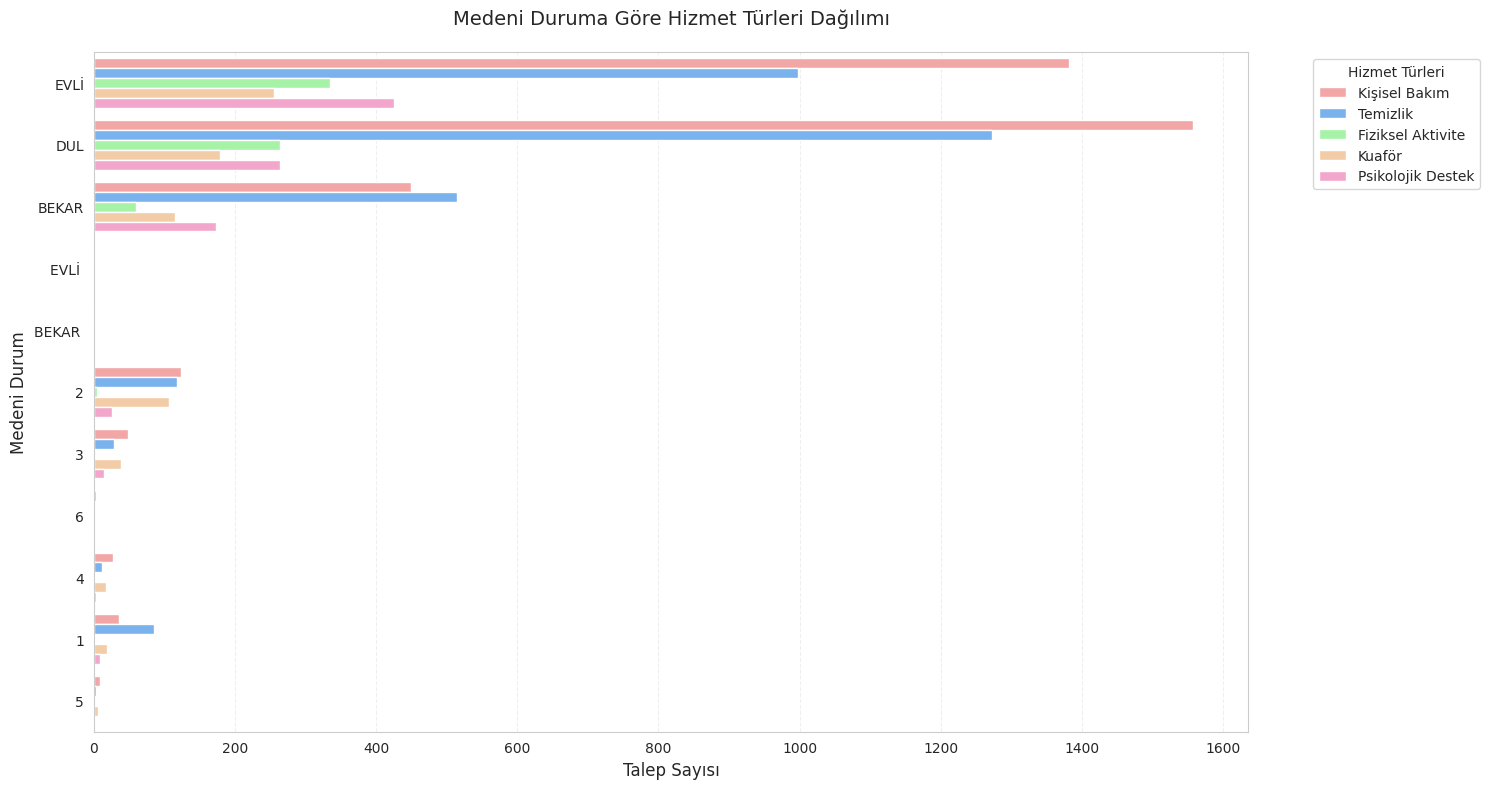


Medeni Duruma Göre Hizmet Talepleri Özeti:

1:
  Fiziksel Aktivite: 1 talep (%0.7)
  Kişisel Bakım: 35 talep (%23.6)
  Kuaför: 19 talep (%12.8)
  Psikolojik Destek: 8 talep (%5.4)
  Temizlik: 85 talep (%57.4)
  Toplam: 148 talep

2:
  Fiziksel Aktivite: 4 talep (%1.1)
  Kişisel Bakım: 123 talep (%32.6)
  Kuaför: 107 talep (%28.4)
  Psikolojik Destek: 25 talep (%6.6)
  Temizlik: 118 talep (%31.3)
  Toplam: 377 talep

3:
  Fiziksel Aktivite: 0 talep (%0.0)
  Kişisel Bakım: 48 talep (%36.9)
  Kuaför: 38 talep (%29.2)
  Psikolojik Destek: 15 talep (%11.5)
  Temizlik: 29 talep (%22.3)
  Toplam: 130 talep

4:
  Fiziksel Aktivite: 1 talep (%1.7)
  Kişisel Bakım: 27 talep (%45.8)
  Kuaför: 17 talep (%28.8)
  Psikolojik Destek: 3 talep (%5.1)
  Temizlik: 11 talep (%18.6)
  Toplam: 59 talep

5:
  Fiziksel Aktivite: 0 talep (%0.0)
  Kişisel Bakım: 8 talep (%42.1)
  Kuaför: 6 talep (%31.6)
  Psikolojik Destek: 2 talep (%10.5)
  Temizlik: 3 talep (%15.8)
  Toplam: 19 talep

6:
  Fiziksel Aktivite:

In [69]:
# Hizmet türlerini ve Türkçe karşılıklarını tanımlayalım
service_dict = {
    'TALEP_KISISEL_BAKIM': 'Kişisel Bakım',
    'TALEP_TEMIZLIK': 'Temizlik',
    'TALEP_FIZIKSEL_AKTIVITE_DESTEGI': 'Fiziksel Aktivite',
    'TALEP_KUAFOR': 'Kuaför',
    'TALEP_PSIKOLOJIK_DESTEK': 'Psikolojik Destek'
}

# Veriyi uzun formata dönüştürelim
melted_df = pd.melt(df,
                    id_vars=['MEDENI_DURUMU'],
                    value_vars=service_columns,
                    var_name='Hizmet_Turu',
                    value_name='Talep')

# Sadece X olan talepleri alalım
melted_df = melted_df[melted_df['Talep'] == 'X']

# Hizmet türü isimlerini Türkçeleştirelim
melted_df['Hizmet_Turu'] = melted_df['Hizmet_Turu'].map(service_dict)

# Grafik boyutunu ayarlayalım
plt.figure(figsize=(15, 8))

# Seaborn ile çubuk grafik
sns.countplot(data=melted_df,
             y='MEDENI_DURUMU',
             hue='Hizmet_Turu',
             palette=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])

# Başlık ve etiketler
plt.title('Medeni Duruma Göre Hizmet Türleri Dağılımı', pad=20, fontsize=14)
plt.xlabel('Talep Sayısı', fontsize=12)
plt.ylabel('Medeni Durum', fontsize=12)

# Göstergeyi düzenle
plt.legend(title='Hizmet Türleri', bbox_to_anchor=(1.05, 1), loc='upper left')

# Izgara çizgileri
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Sayısal özet
print("\nMedeni Duruma Göre Hizmet Talepleri Özeti:")
summary = melted_df.groupby(['MEDENI_DURUMU', 'Hizmet_Turu']).size().unstack(fill_value=0)
for status in summary.index:
    print(f"\n{status}:")
    toplam = summary.loc[status].sum()
    for hizmet in summary.columns:
        sayi = summary.loc[status, hizmet]
        yuzde = (sayi / toplam) * 100
        print(f"  {hizmet}: {sayi:,} talep (%{yuzde:.1f})")
    print(f"  Toplam: {toplam:,} talep")

<ipython-input-68-6c5bbe88cd6b>:36: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=durum_df,
<ipython-input-68-6c5bbe88cd6b>:36: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=durum_df,


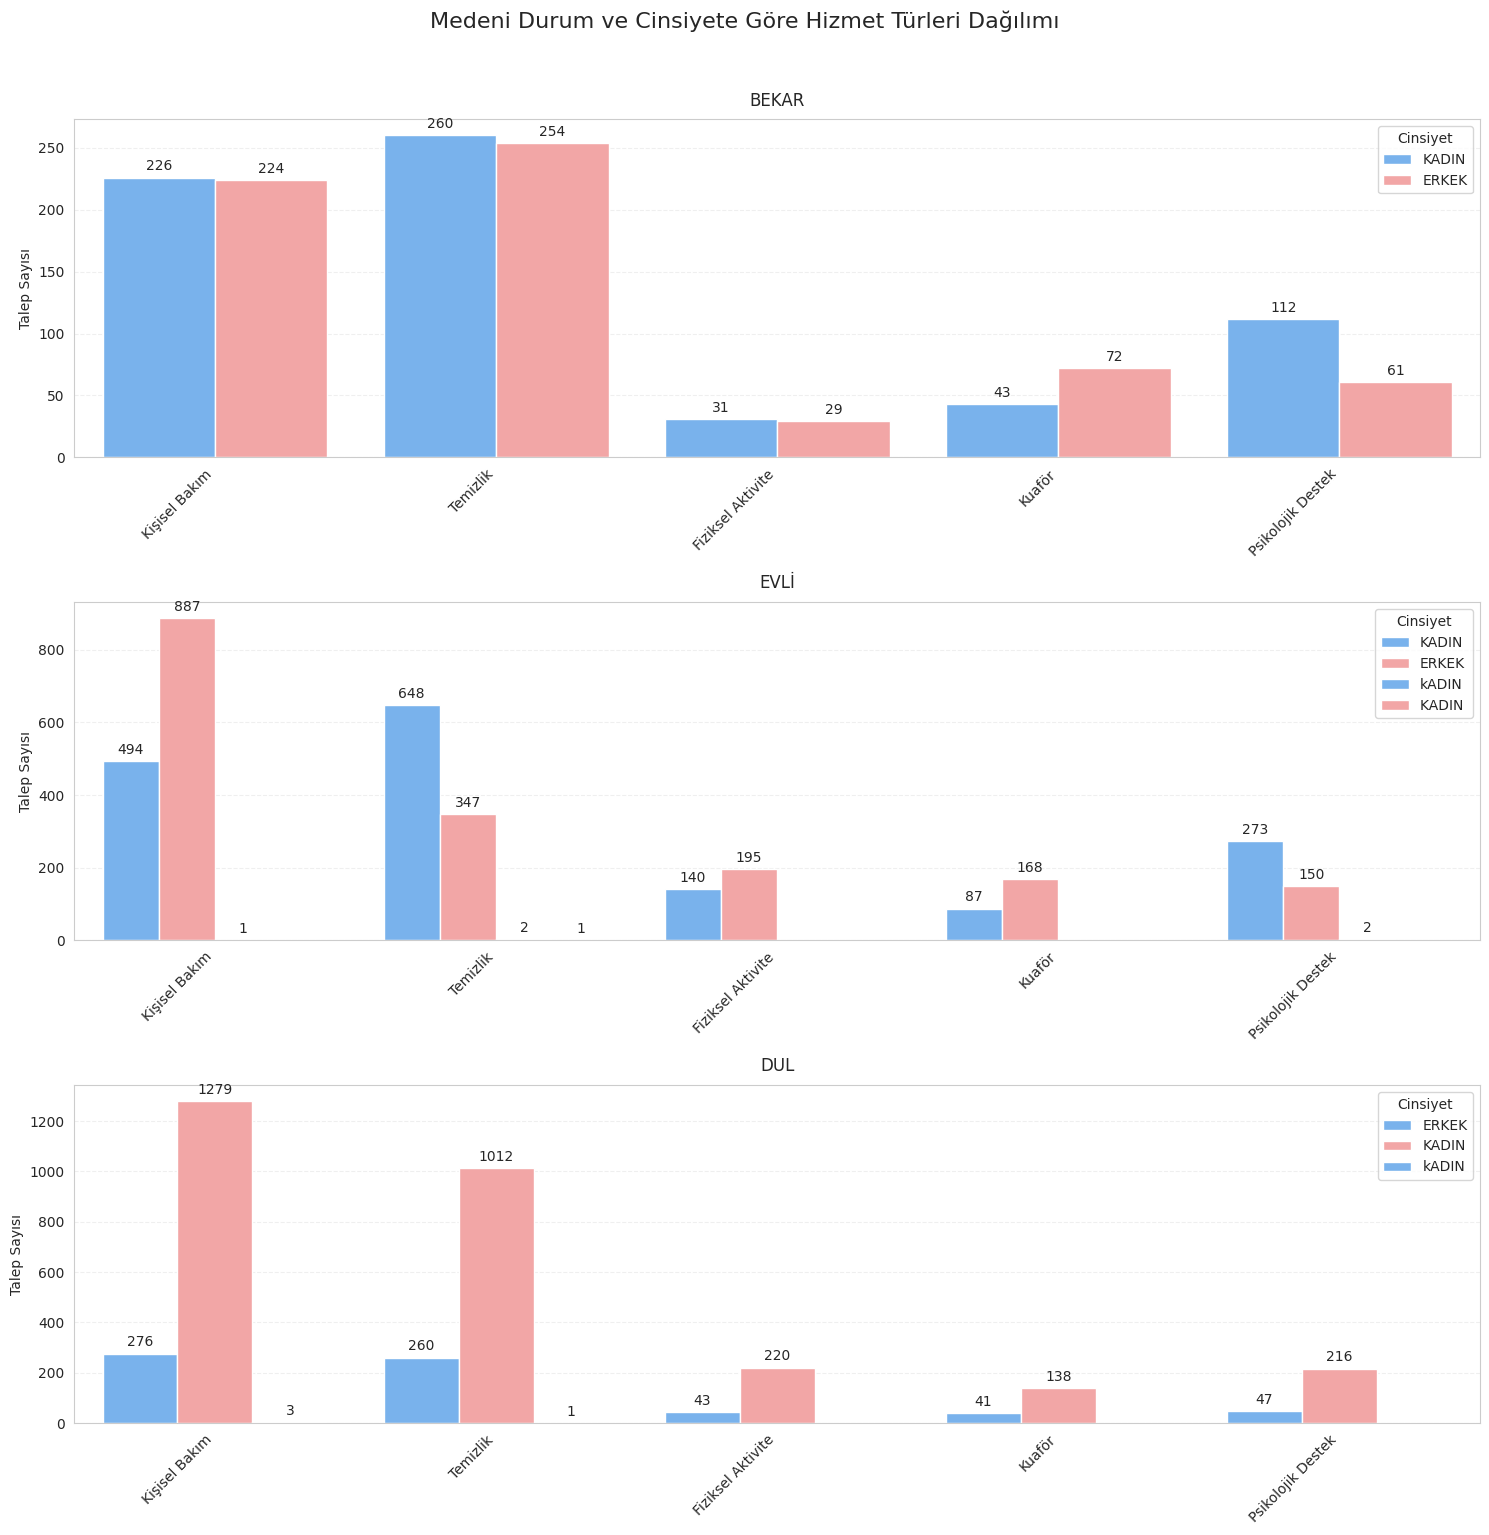


Medeni Duruma ve Cinsiyete Göre Hizmet Talepleri Özeti:

BEKAR:
  KADIN:
    Temizlik: 260 talep (%38.7)
    Kişisel Bakım: 226 talep (%33.6)
    Psikolojik Destek: 112 talep (%16.7)
    Kuaför: 43 talep (%6.4)
    Fiziksel Aktivite: 31 talep (%4.6)
    Toplam: 672 talep
  ERKEK:
    Temizlik: 254 talep (%39.7)
    Kişisel Bakım: 224 talep (%35.0)
    Kuaför: 72 talep (%11.2)
    Psikolojik Destek: 61 talep (%9.5)
    Fiziksel Aktivite: 29 talep (%4.5)
    Toplam: 640 talep

EVLİ:
  KADIN:
    Temizlik: 648 talep (%39.5)
    Kişisel Bakım: 494 talep (%30.1)
    Psikolojik Destek: 273 talep (%16.6)
    Fiziksel Aktivite: 140 talep (%8.5)
    Kuaför: 87 talep (%5.3)
    Toplam: 1,642 talep
  ERKEK:
    Kişisel Bakım: 887 talep (%50.8)
    Temizlik: 347 talep (%19.9)
    Fiziksel Aktivite: 195 talep (%11.2)
    Kuaför: 168 talep (%9.6)
    Psikolojik Destek: 150 talep (%8.6)
    Toplam: 1,747 talep

DUL:
  KADIN:
    Kişisel Bakım: 1,279 talep (%44.6)
    Temizlik: 1,012 talep (%35.3)
  

In [68]:
# Hizmet türlerini ve Türkçe karşılıklarını tanımlayalım
service_dict = {
    'TALEP_KISISEL_BAKIM': 'Kişisel Bakım',
    'TALEP_TEMIZLIK': 'Temizlik',
    'TALEP_FIZIKSEL_AKTIVITE_DESTEGI': 'Fiziksel Aktivite',
    'TALEP_KUAFOR': 'Kuaför',
    'TALEP_PSIKOLOJIK_DESTEK': 'Psikolojik Destek'
}

# Veriyi uzun formata dönüştürelim
melted_df = pd.melt(df,
                    id_vars=['MEDENI_DURUMU', 'CINSIYET'],
                    value_vars=service_columns,
                    var_name='Hizmet_Turu',
                    value_name='Talep')

# Sadece X olan talepleri ve geçerli medeni durumları alalım
melted_df = melted_df[melted_df['Talep'] == 'X']
melted_df = melted_df[melted_df['MEDENI_DURUMU'].isin(['BEKAR', 'EVLİ', 'DUL'])]

# Hizmet türü isimlerini Türkçeleştirelim
melted_df['Hizmet_Turu'] = melted_df['Hizmet_Turu'].map(service_dict)

# Medeni durumları alalım
medeni_durumlar = ['BEKAR', 'EVLİ', 'DUL']

# Her medeni durum için ayrı grafik oluşturalım
fig, axes = plt.subplots(len(medeni_durumlar), 1, figsize=(15, 5*len(medeni_durumlar)))
fig.suptitle('Medeni Durum ve Cinsiyete Göre Hizmet Türleri Dağılımı', fontsize=16, y=1.02)

for idx, durum in enumerate(medeni_durumlar):
    # Medeni duruma göre filtrele
    durum_df = melted_df[melted_df['MEDENI_DURUMU'] == durum]

    # Seaborn ile çubuk grafik
    sns.countplot(data=durum_df,
                 x='Hizmet_Turu',
                 hue='CINSIYET',
                 ax=axes[idx],
                 palette=['#66B2FF', '#FF9999'])

    # Başlık ve etiketler
    axes[idx].set_title(f'{durum}', pad=10, fontsize=12)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Talep Sayısı', fontsize=10)

    # X ekseni etiketlerini döndür
    for label in axes[idx].get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

    # Izgara çizgileri
    axes[idx].grid(axis='y', linestyle='--', alpha=0.3)

    # Göstergeyi düzenle
    axes[idx].legend(title='Cinsiyet')

    # Barların üzerine sayıları ekle
    for container in axes[idx].containers:
        axes[idx].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

# Sayısal özet
print("\nMedeni Duruma ve Cinsiyete Göre Hizmet Talepleri Özeti:")
for durum in medeni_durumlar:
    print(f"\n{durum}:")
    durum_df = melted_df[melted_df['MEDENI_DURUMU'] == durum]

    for cinsiyet in ['KADIN', 'ERKEK']:
        cinsiyet_df = durum_df[durum_df['CINSIYET'] == cinsiyet]
        if len(cinsiyet_df) > 0:
            print(f"  {cinsiyet}:")
            hizmet_sayilari = cinsiyet_df['Hizmet_Turu'].value_counts()
            toplam = len(cinsiyet_df)

            for hizmet, sayi in hizmet_sayilari.items():
                yuzde = (sayi / toplam) * 100
                print(f"    {hizmet}: {sayi:,} talep (%{yuzde:.1f})")
            print(f"    Toplam: {toplam:,} talep")

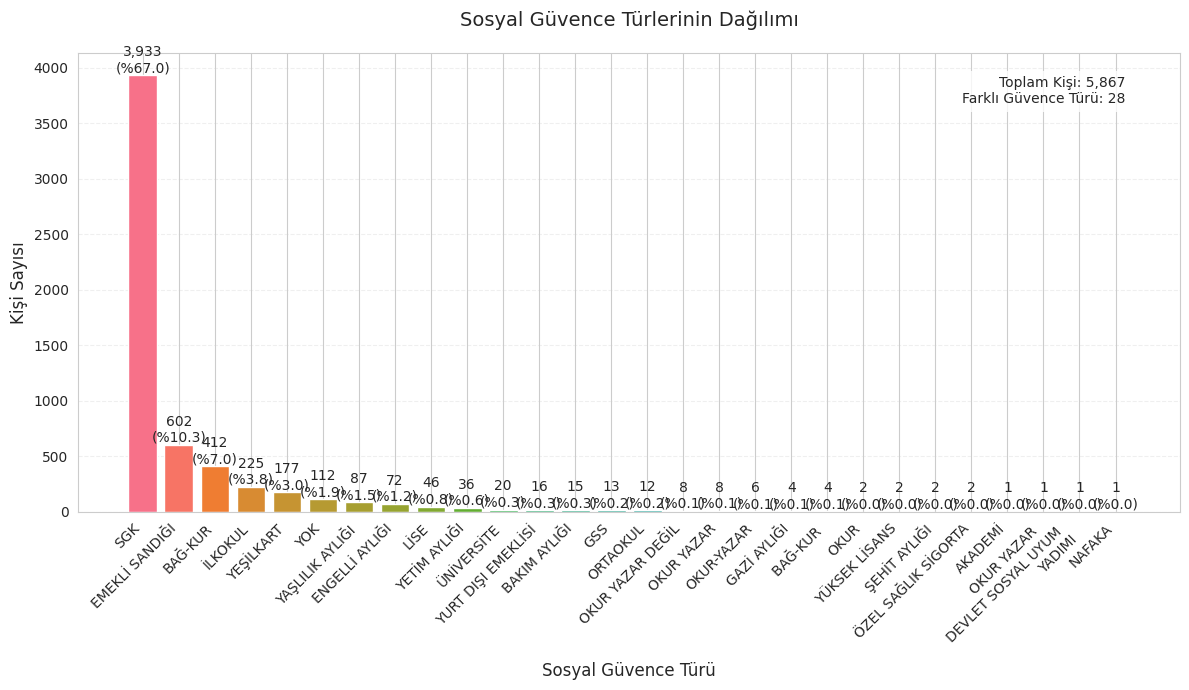


Sosyal Güvence Türleri Dağılımı:
--------------------------------------------------
SGK:
  Kişi Sayısı: 3,933
  Yüzde: %67.0
--------------------------------------------------
EMEKLİ SANDIĞI:
  Kişi Sayısı: 602
  Yüzde: %10.3
--------------------------------------------------
BAĞ-KUR:
  Kişi Sayısı: 412
  Yüzde: %7.0
--------------------------------------------------
İLKOKUL:
  Kişi Sayısı: 225
  Yüzde: %3.8
--------------------------------------------------
YEŞİLKART:
  Kişi Sayısı: 177
  Yüzde: %3.0
--------------------------------------------------
YOK:
  Kişi Sayısı: 112
  Yüzde: %1.9
--------------------------------------------------
YAŞLILIK AYLIĞI:
  Kişi Sayısı: 87
  Yüzde: %1.5
--------------------------------------------------
ENGELLİ AYLIĞI:
  Kişi Sayısı: 72
  Yüzde: %1.2
--------------------------------------------------
LİSE:
  Kişi Sayısı: 46
  Yüzde: %0.8
--------------------------------------------------
YETİM AYLIĞI:
  Kişi Sayısı: 36
  Yüzde: %0.6
------------------

In [67]:
# Sosyal güvence dağılımını hesapla
sosyal_guvence_df = df['SOSYAL_GUVENCESI'].value_counts().reset_index()
sosyal_guvence_df.columns = ['Güvence Türü', 'Kişi Sayısı']
sosyal_guvence_df['Yüzde'] = (sosyal_guvence_df['Kişi Sayısı'] / len(df)) * 100

# Grafik boyutunu ayarla
plt.figure(figsize=(12, 7))

# Ana barplot
bars = plt.bar(
    sosyal_guvence_df['Güvence Türü'],
    sosyal_guvence_df['Kişi Sayısı'],
    color=sns.color_palette('husl', len(sosyal_guvence_df))
)

# Başlık ve etiketler
plt.title('Sosyal Güvence Türlerinin Dağılımı', fontsize=14, pad=20)
plt.xlabel('Sosyal Güvence Türü', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)

# X ekseni etiketlerini düzenle
plt.xticks(rotation=45, ha='right')

# Izgara çizgileri
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Barların üzerine değerleri ekle
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height):,}\n(%{sosyal_guvence_df["Yüzde"][i]:.1f})',
        ha='center',
        va='bottom'
    )

# İstatistik kutusu ekle
stats_text = f'Toplam Kişi: {len(df):,}\n'
stats_text += f'Farklı Güvence Türü: {len(sosyal_guvence_df)}'

plt.text(
    0.95, 0.95,
    stats_text,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
    ha='right',
    va='top'
)

plt.tight_layout()
plt.show()

# Detaylı sayısal özet
print("\nSosyal Güvence Türleri Dağılımı:")
print("-" * 50)
for _, row in sosyal_guvence_df.iterrows():
    print(f"{row['Güvence Türü']}:")
    print(f"  Kişi Sayısı: {row['Kişi Sayısı']:,}")
    print(f"  Yüzde: %{row['Yüzde']:.1f}")
    print("-" * 50)

<Figure size 1400x800 with 0 Axes>

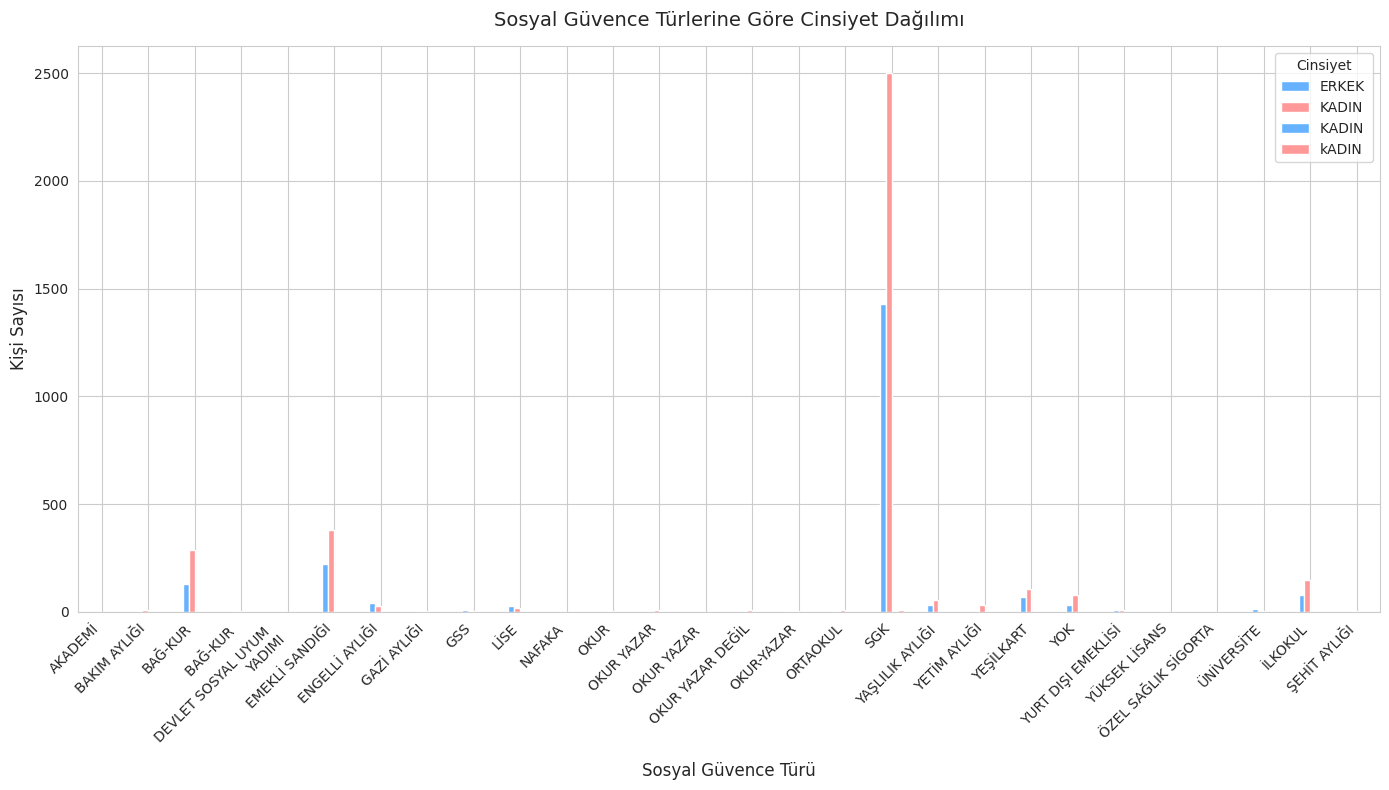

In [66]:
# Sosyal Güvence ve Cinsiyete göre dağılımı hesaplayalım
sosyal_guvence_cinsiyet = df.groupby(['SOSYAL_GUVENCESI', 'CINSIYET']).size().unstack(fill_value=0)

# Grafik oluşturma
plt.figure(figsize=(14, 8))
sosyal_guvence_cinsiyet.plot(kind='bar', figsize=(14, 8), stacked=False, color=['#66B2FF', '#FF9999'])

# Başlık ve eksen etiketlerini ekleyelim
plt.title("Sosyal Güvence Türlerine Göre Cinsiyet Dağılımı", fontsize=14, pad=15)
plt.xlabel("Sosyal Güvence Türü", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cinsiyet", loc='upper right')
plt.tight_layout()
plt.show()

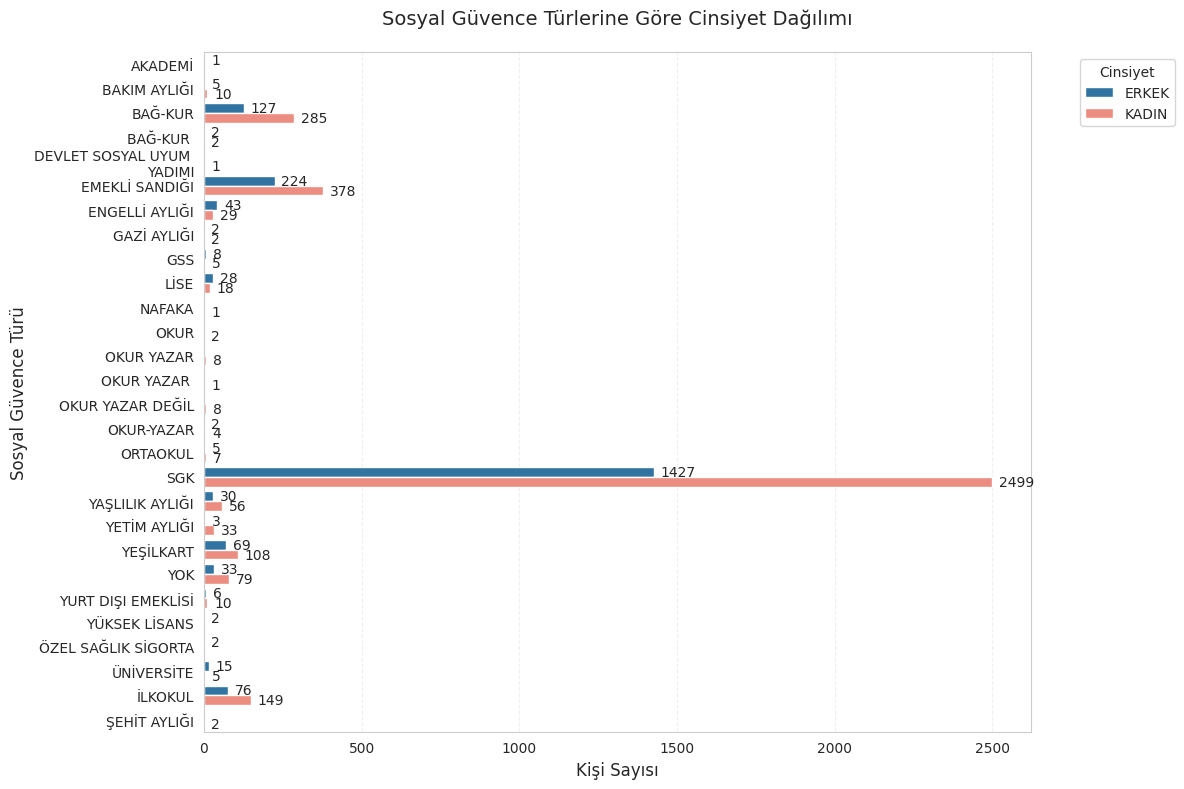


Sosyal Güvence ve Cinsiyet Dağılımı:

AKADEMİ:
  ERKEK: 1 kişi (%100.0)
  Toplam: 1 kişi
--------------------------------------------------

BAKIM AYLIĞI:
  ERKEK: 5 kişi (%33.3)
  KADIN: 10 kişi (%66.7)
  Toplam: 15 kişi
--------------------------------------------------

BAĞ-KUR:
  ERKEK: 127 kişi (%30.8)
  KADIN: 285 kişi (%69.2)
  Toplam: 412 kişi
--------------------------------------------------

BAĞ-KUR :
  ERKEK: 2 kişi (%50.0)
  KADIN: 2 kişi (%50.0)
  Toplam: 4 kişi
--------------------------------------------------

DEVLET SOSYAL UYUM 
YADIMI:
  KADIN: 1 kişi (%100.0)
  Toplam: 1 kişi
--------------------------------------------------

EMEKLİ SANDIĞI:
  ERKEK: 224 kişi (%37.2)
  KADIN: 378 kişi (%62.8)
  Toplam: 602 kişi
--------------------------------------------------

ENGELLİ AYLIĞI:
  ERKEK: 43 kişi (%59.7)
  KADIN: 29 kişi (%40.3)
  Toplam: 72 kişi
--------------------------------------------------

GAZİ AYLIĞI:
  ERKEK: 2 kişi (%50.0)
  KADIN: 2 kişi (%50.0)
  Toplam

In [65]:
# Sadece KADIN ve ERKEK olan verileri alalım
df_filtered = df[df['CINSIYET'].isin(['KADIN', 'ERKEK'])]
df_filtered = df_filtered.dropna(subset=['SOSYAL_GUVENCESI'])

# Veriyi uzun formata dönüştürelim
sosyal_guvence_df = df_filtered.groupby(['SOSYAL_GUVENCESI', 'CINSIYET']).size().reset_index(name='Sayı')

# Grafik boyutunu ayarla
plt.figure(figsize=(12, 8))

# Seaborn ile çubuk grafik
sns.barplot(data=sosyal_guvence_df,
            y='SOSYAL_GUVENCESI',
            x='Sayı',
            hue='CINSIYET',
            palette=['#1f77b4', '#fd7f6f'])  # Koyu mavi ve somon rengi

# Başlık ve etiketler
plt.title("Sosyal Güvence Türlerine Göre Cinsiyet Dağılımı", fontsize=14, pad=20)
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Sosyal Güvence Türü", fontsize=12)

# Göstergeyi düzenle
plt.legend(title="Cinsiyet", bbox_to_anchor=(1.05, 1), loc='upper left')

# Izgara çizgileri
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Barların üzerine sayıları ekle
for i in plt.gca().containers:
    plt.gca().bar_label(i, padding=5)

plt.tight_layout()
plt.show()

# Sayısal özet
print("\nSosyal Güvence ve Cinsiyet Dağılımı:")
for guvence in sosyal_guvence_df['SOSYAL_GUVENCESI'].unique():
    print(f"\n{guvence}:")
    guvence_data = sosyal_guvence_df[sosyal_guvence_df['SOSYAL_GUVENCESI'] == guvence]
    toplam = guvence_data['Sayı'].sum()

    for _, row in guvence_data.iterrows():
        yuzde = (row['Sayı'] / toplam) * 100
        print(f"  {row['CINSIYET']}: {row['Sayı']:,} kişi (%{yuzde:.1f})")
    print(f"  Toplam: {toplam:,} kişi")
    print("-" * 50)

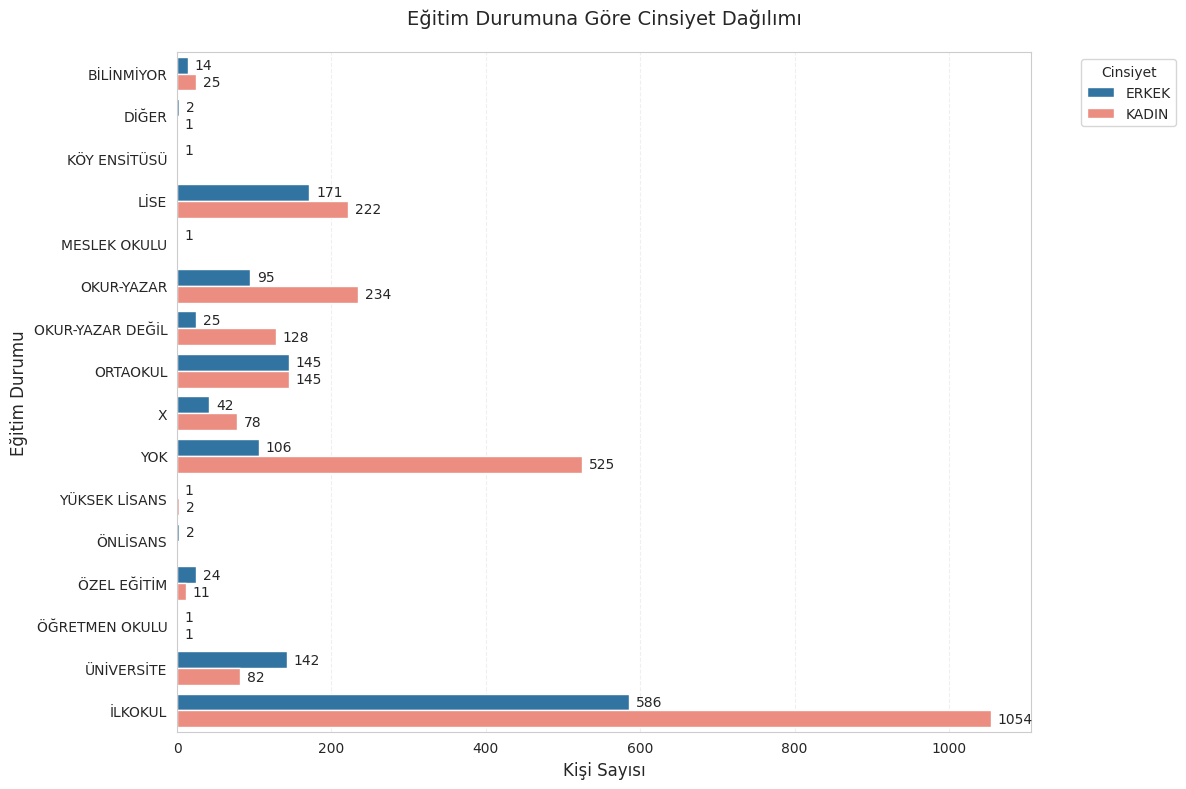


Eğitim Durumu ve Cinsiyet Dağılımı:

BİLİNMİYOR:
  ERKEK: 14 kişi (%35.9)
  KADIN: 25 kişi (%64.1)
  Toplam: 39 kişi
--------------------------------------------------

DİĞER:
  ERKEK: 2 kişi (%66.7)
  KADIN: 1 kişi (%33.3)
  Toplam: 3 kişi
--------------------------------------------------

KÖY ENSİTÜSÜ:
  ERKEK: 1 kişi (%100.0)
  Toplam: 1 kişi
--------------------------------------------------

LİSE:
  ERKEK: 171 kişi (%43.5)
  KADIN: 222 kişi (%56.5)
  Toplam: 393 kişi
--------------------------------------------------

MESLEK OKULU:
  ERKEK: 1 kişi (%100.0)
  Toplam: 1 kişi
--------------------------------------------------

OKUR-YAZAR:
  ERKEK: 95 kişi (%28.9)
  KADIN: 234 kişi (%71.1)
  Toplam: 329 kişi
--------------------------------------------------

OKUR-YAZAR DEĞİL:
  ERKEK: 25 kişi (%16.3)
  KADIN: 128 kişi (%83.7)
  Toplam: 153 kişi
--------------------------------------------------

ORTAOKUL:
  ERKEK: 145 kişi (%50.0)
  KADIN: 145 kişi (%50.0)
  Toplam: 290 kişi
------

In [64]:
# Sadece KADIN ve ERKEK olan verileri alalım ve eksik verileri filtreleyelim
df_filtered = df[df['CINSIYET'].isin(['KADIN', 'ERKEK'])]
df_filtered = df_filtered[df_filtered['EGITIM_DURUMU'] != 'EKSIK VERI']

# Veriyi uzun formata dönüştürelim
egitim_cinsiyet_df = df_filtered.groupby(['EGITIM_DURUMU', 'CINSIYET']).size().reset_index(name='Sayı')

# Grafik boyutunu ayarla
plt.figure(figsize=(12, 8))

# Seaborn ile çubuk grafik
sns.barplot(data=egitim_cinsiyet_df,
            y='EGITIM_DURUMU',
            x='Sayı',
            hue='CINSIYET',
            palette=['#1f77b4', '#fd7f6f'])  # Koyu mavi ve somon rengi

# Başlık ve etiketler
plt.title("Eğitim Durumuna Göre Cinsiyet Dağılımı", fontsize=14, pad=20)
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Eğitim Durumu", fontsize=12)

# Göstergeyi düzenle
plt.legend(title="Cinsiyet", bbox_to_anchor=(1.05, 1), loc='upper left')

# Izgara çizgileri
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Barların üzerine sayıları ekle
for i in plt.gca().containers:
    plt.gca().bar_label(i, padding=5)

plt.tight_layout()
plt.show()

# Sayısal özet
print("\nEğitim Durumu ve Cinsiyet Dağılımı:")
for egitim in egitim_cinsiyet_df['EGITIM_DURUMU'].unique():
    print(f"\n{egitim}:")
    egitim_data = egitim_cinsiyet_df[egitim_cinsiyet_df['EGITIM_DURUMU'] == egitim]
    toplam = egitim_data['Sayı'].sum()

    for _, row in egitim_data.iterrows():
        yuzde = (row['Sayı'] / toplam) * 100
        print(f"  {row['CINSIYET']}: {row['Sayı']:,} kişi (%{yuzde:.1f})")
    print(f"  Toplam: {toplam:,} kişi")
    print("-" * 50)